# **Agglomerative Clustering**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pair_confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

random_state = 42

In [3]:
#load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df0 = pd.read_csv(url)

In [4]:
df0.head()


Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [5]:
df0.describe(include= "all")

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [6]:
print("The dataset has {} number of rows and {} number of columns respectively".format(df0.shape[0],df0.shape[1]))

The dataset has 440 number of rows and 8 number of columns respectively


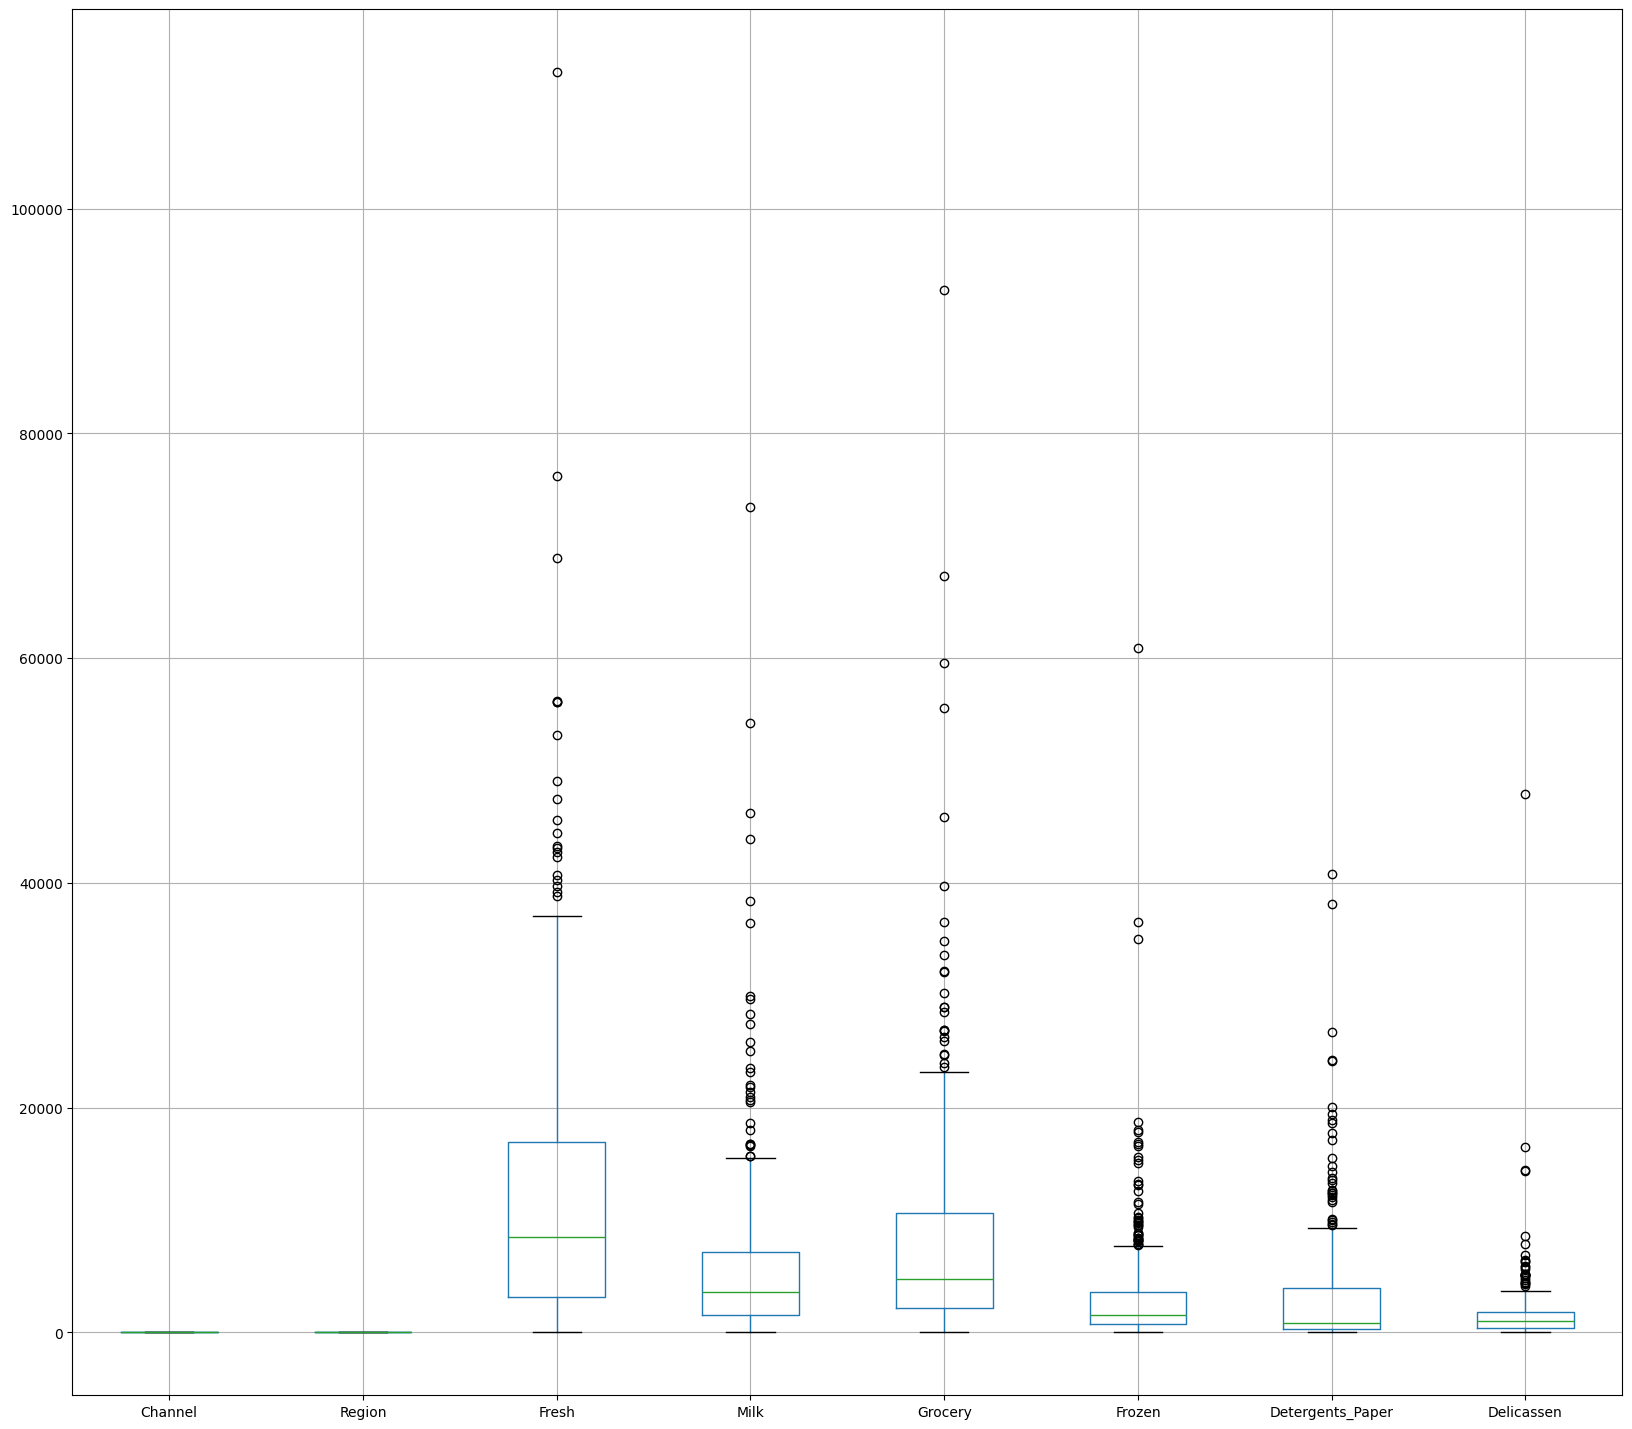

In [7]:
#EDA
df0.boxplot(figsize=(20,18))
plt.show()

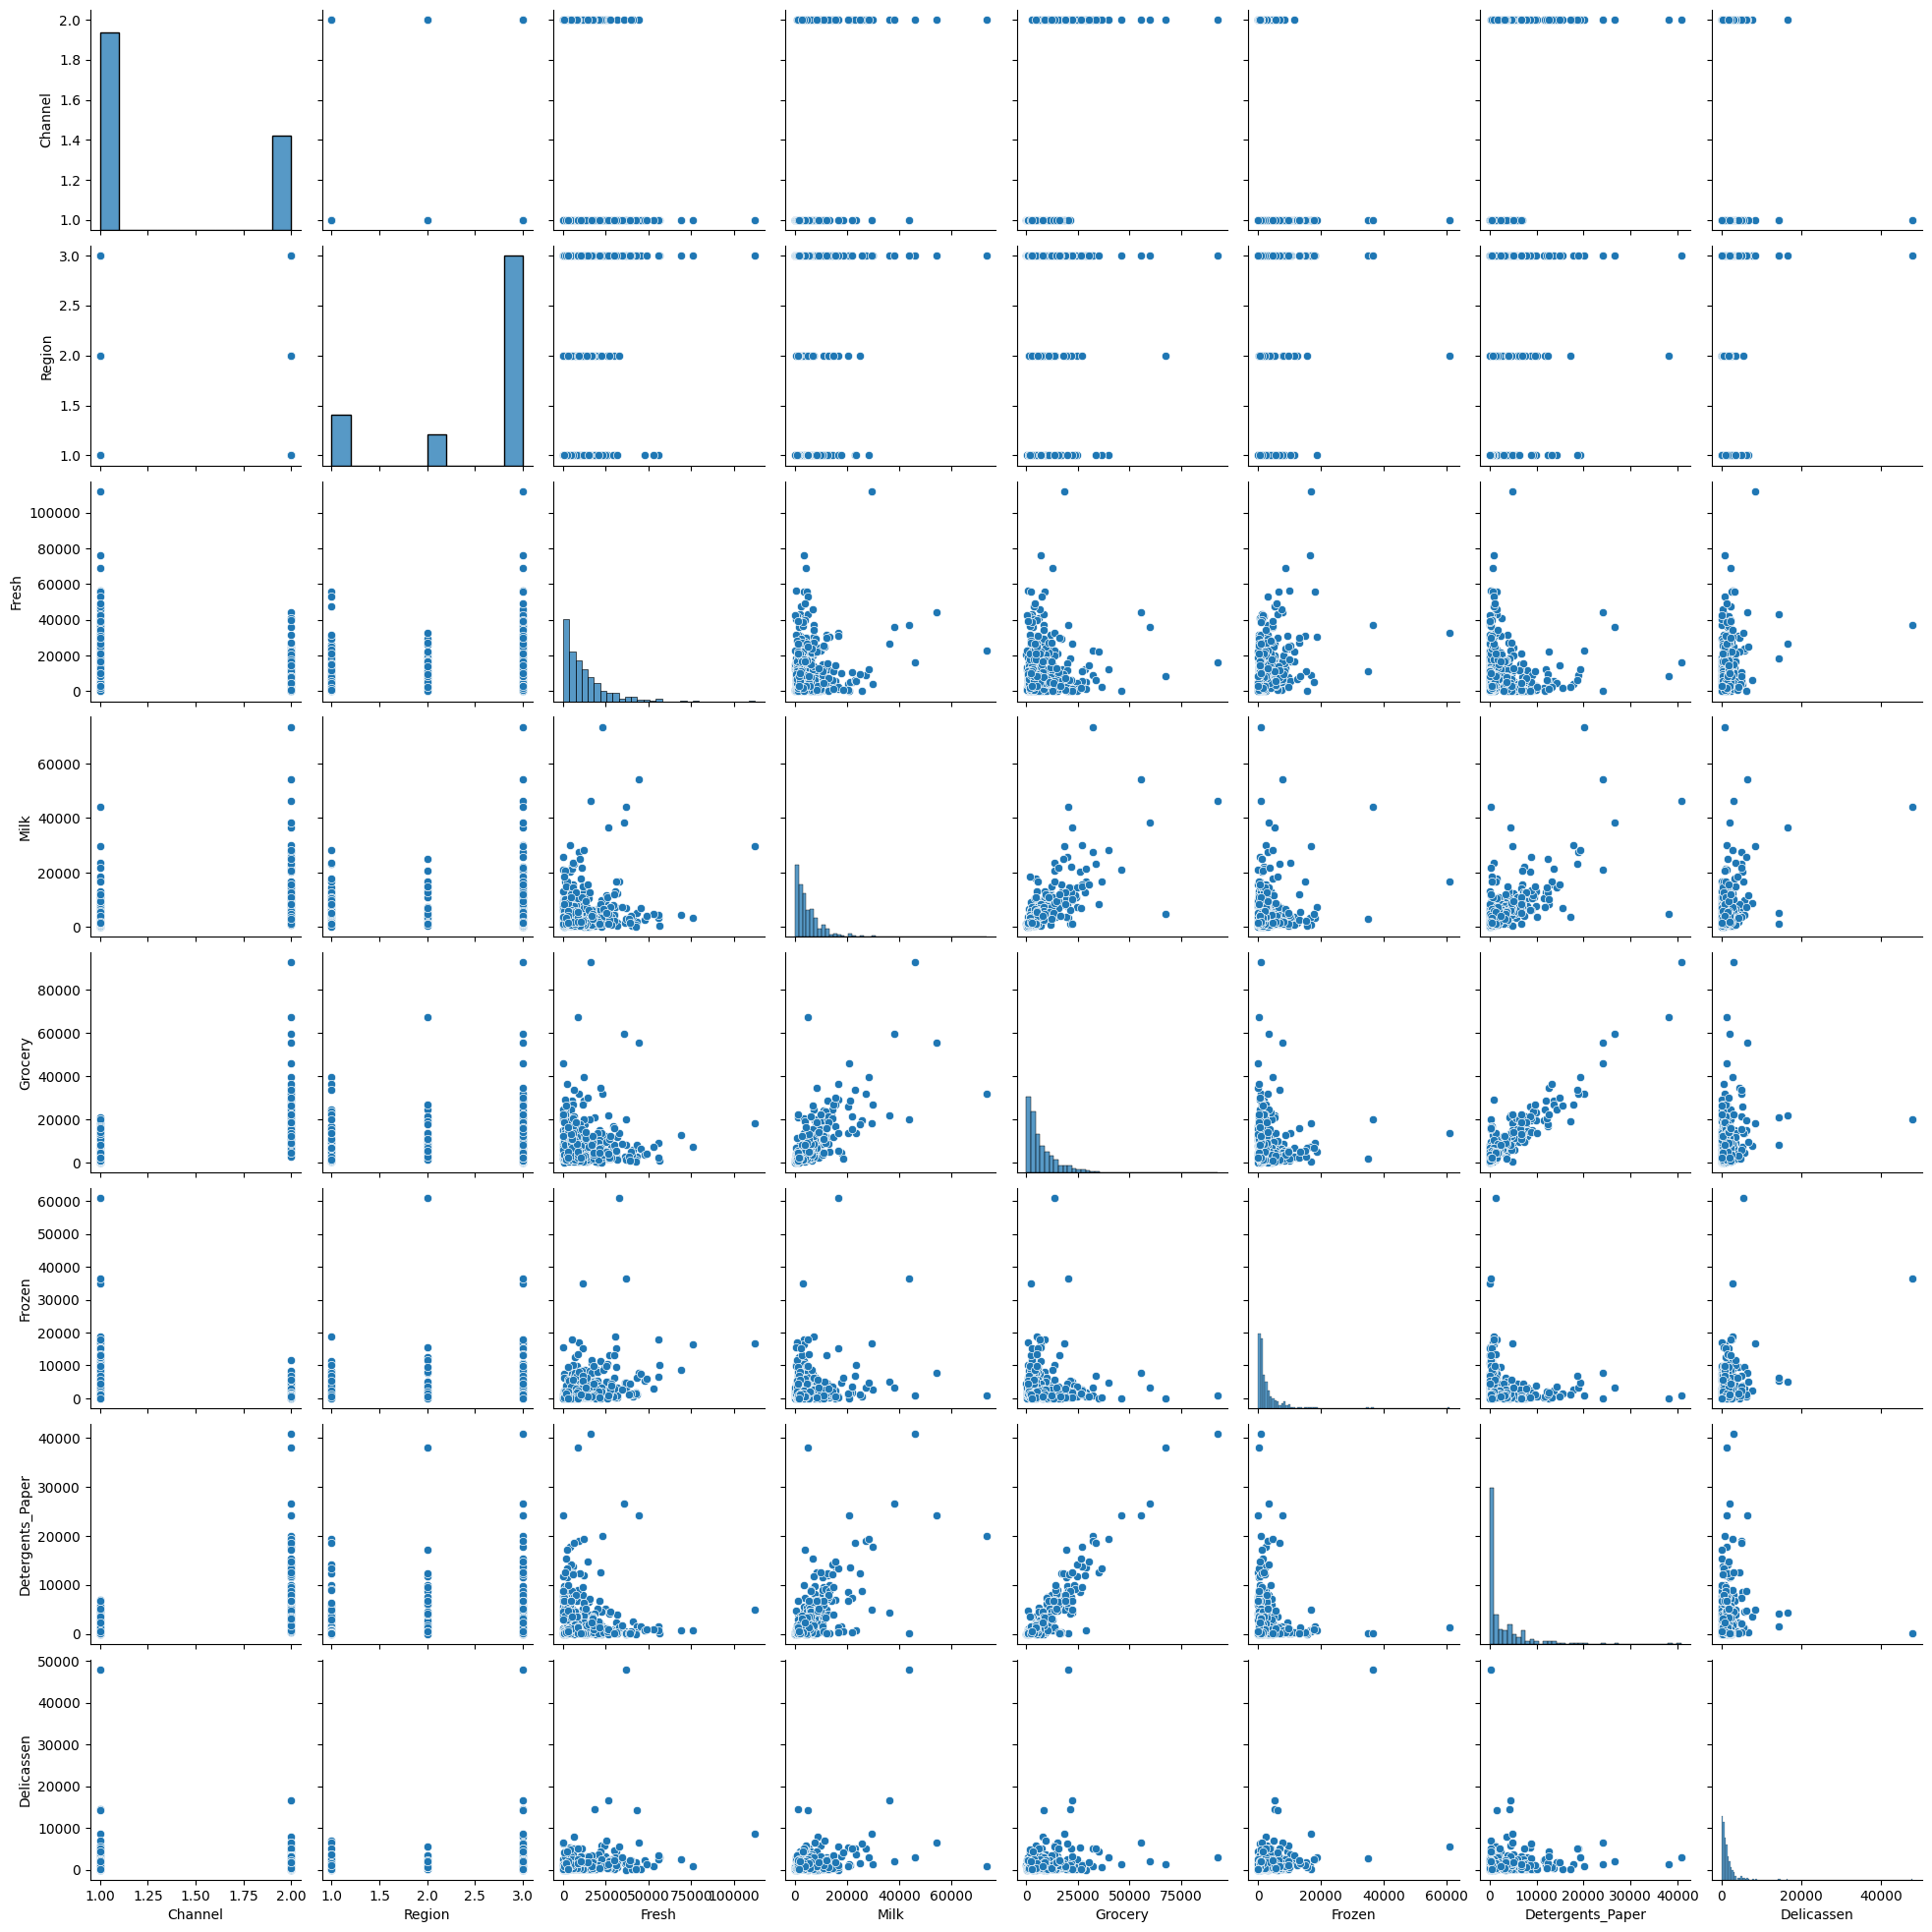

In [8]:
sns.pairplot(df0)
plt.show()

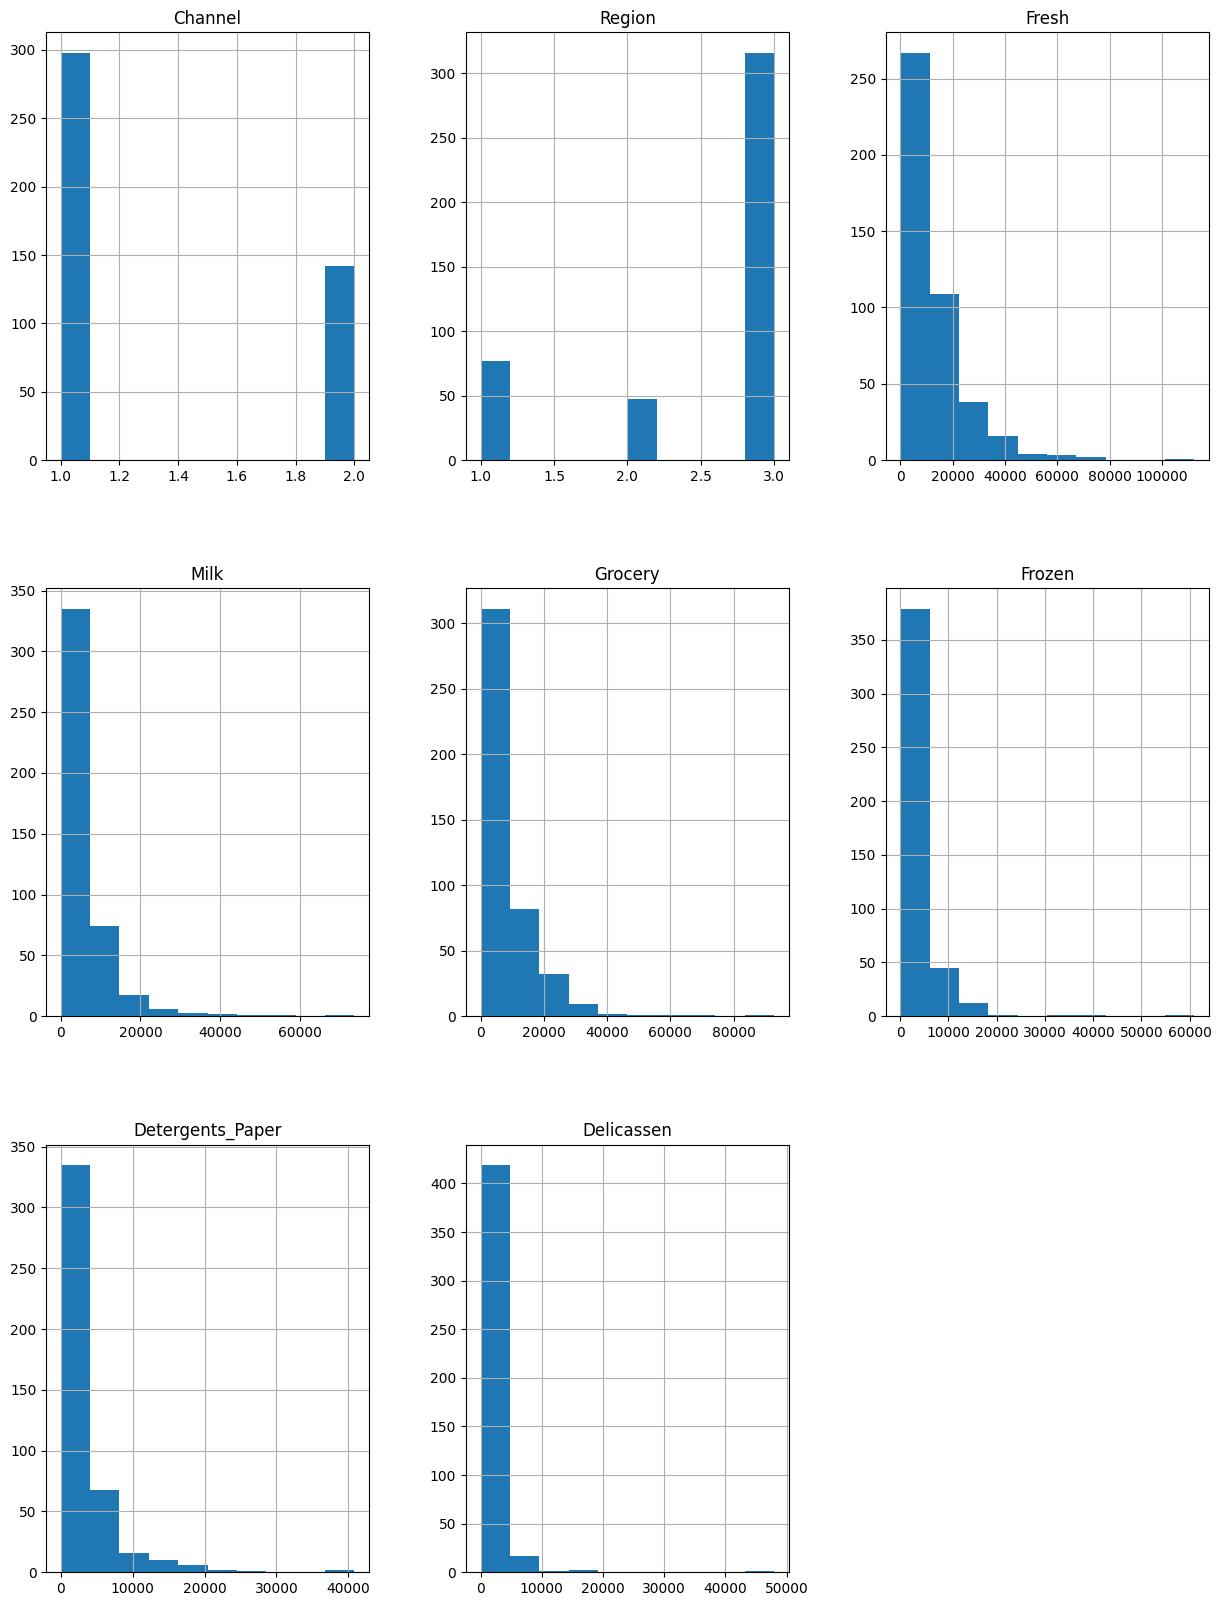

In [11]:
df0.hist(figsize=(15,20))
plt.show()

In [16]:
#powertransformer reduces skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x_pt = pd.DataFrame(pt.fit_transform(df0.iloc[:,2:]),
columns = df0.columns[2:]
)
#we need to re-attach the columns as well again
x_transf = pd.concat([df0.iloc[:,:2], x_pt] , axis = 1)

In [19]:
#Min–Max Scaling (distance fairness)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

X= pd.DataFrame(mms.fit_transform(x_transf),
columns = x_transf.columns
)
#All features scaled to [0,1]
#Required for meaningful distance computation

In [20]:
#Agglomerative hyperparameters: n_clusters and linkage
#defien hyperparameter grid
k_range = list(range(2,11))
parameters = [{'n_clusters' : k_range,
               'linkage' : ['ward', 'complete', 'average', 'single']

               }]
pg = list(ParameterGrid(parameters))

In [21]:
X.head()

Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.501828  0.667606  0.625238  0.208640          0.649941   
1      1.0     1.0  0.414266  0.670028  0.655690  0.458800          0.674852   
2      1.0     1.0  0.400077  0.653586  0.627297  0.499856          0.682752   
3      0.0     1.0  0.509368  0.369264  0.553550  0.636716          0.461095   
4      1.0     1.0  0.604755  0.580657  0.618985  0.566470          0.601884   

   Delicassen  
0    0.412016  
1    0.445663  
2    0.654292  
3    0.446485  
4    0.590255

In [23]:
#Grid search using silhouette score

result_ac = []
for i in range(len(pg)):
  ac = AgglomerativeClustering(**pg[i])
  y_ac = ac.fit_predict(X)
  result_ac.append([pg[i]['linkage'] , pg[i]['n_clusters'] , silhouette_score(X,y_ac)])


In [24]:
#Results table & sorting
df_result_ac = pd.DataFrame(result_ac , columns = ['linkage' , 'n_clusters', 'silhouette_score'])
df_result_ac.sort_values(by = 'silhouette_score' , ascending = False)

linkage  n_clusters  silhouette_score
0       ward           2          0.499350
27    single           2          0.499350
18   average           2          0.499350
9   complete           2          0.499350
1       ward           3          0.498333
2       ward           4          0.493085
20   average           4          0.479507
11  complete           4          0.479507
21   average           5          0.475050
22   average           6          0.443867
23   average           7          0.429079
24   average           8          0.417343
33    single           8          0.402861
19   average           3          0.402228
10  complete           3          0.402228
13  complete           6          0.358410
12  complete           5          0.350571
34    single           9          0.349389
29    single           4          0.343557
28    single           3          0.343530
25   average           9          0.343345
3       ward           5          0.342252
26   average          10          0.338956
4       ward           6          0.333632
35    single          10          0.332562
5       ward           7          0.318470
30    single           5          0.292567
6       ward           8          0.285732
14  complete           7          0.280073
32    single           7          0.257306
7       ward           9          0.256243
8       ward          10          0.242371
15  complete           8          0.224454
31    single           6          0.212586
16  complete           9          0.185725
17  complete          10          0.166637

Why not blindly choose k = 2?

Because:

Differences in silhouette are very small

k = 2 often oversimplifies the data

You want comparability with K-Means, which gave k = 4

This is correct scientific reasoning, not just coding.

Choosing k = 4 with ward is fully justified.

In [25]:
print(df_result_ac.iloc[2])

linkage                 ward
n_clusters                 4
silhouette_score    0.493085
Name: 2, dtype: object


In [26]:
#now we are doing with the best cluster we have fpund based on sil score and linkage
ac = AgglomerativeClustering(n_clusters = 4 , linkage = 'ward')
y_ac = ac.fit_predict(X)
#now this is the final clustering result


Cluster size analysis (VERY IMPORTANT)
What this checks

All clusters are populated

No extremely small or empty clusters

Clustering is meaningful

 Balanced clusters → good solution

In [34]:
clust_sizes_ac = np.unique(y_ac, return_counts=True)
print(clust_sizes_ac)



(array([0, 1, 2, 3]), array([212,  37,  86, 105]))


In [33]:
from sklearn.metrics import silhouette_score

# Final silhouette score
final_sil_score = silhouette_score(X, y_ac)

# Best parameters from your grid search
best_params = df_result_ac.iloc[2]  # contains linkage, n_clusters, silhouette_score

print("=== Final Agglomerative Clustering Results ===")
print(f"Number of clusters: {best_params.n_clusters}")
print(f"Linkage method: {best_params.linkage}")
print(f"Silhouette score from fit: {final_sil_score:.4f}")


=== Final Agglomerative Clustering Results ===
Number of clusters: 4
Linkage method: ward
Silhouette score from fit: 0.4931


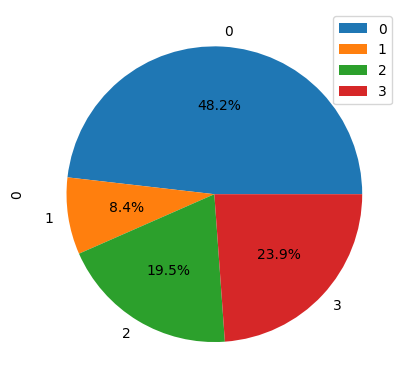

In [35]:
#make pieplot
pd.DataFrame(clust_sizes_ac[1]).plot.pie(y=0, autopct='%1.1f%%', );
plt.show()

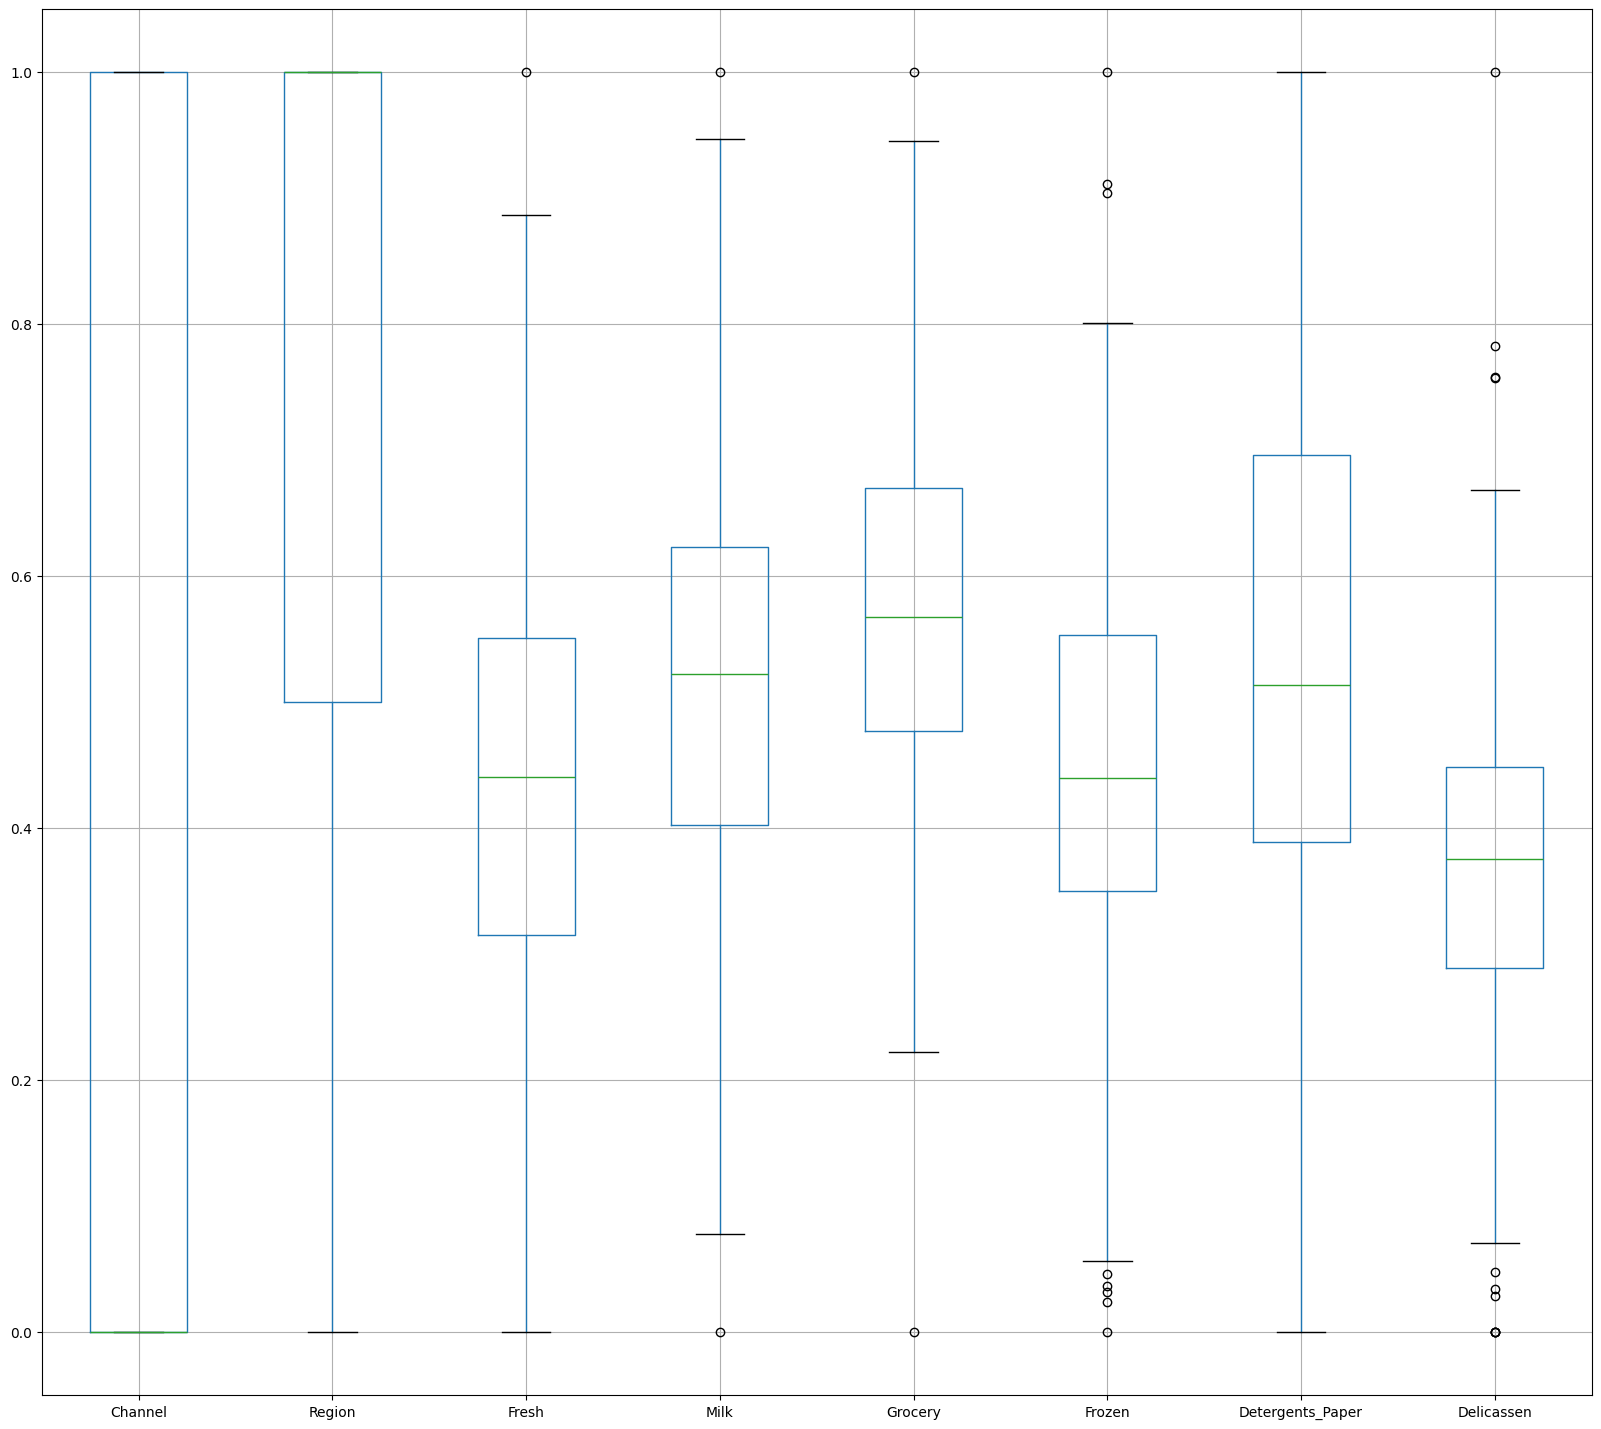

In [40]:
X.boxplot(figsize=(20,18))
plt.show()

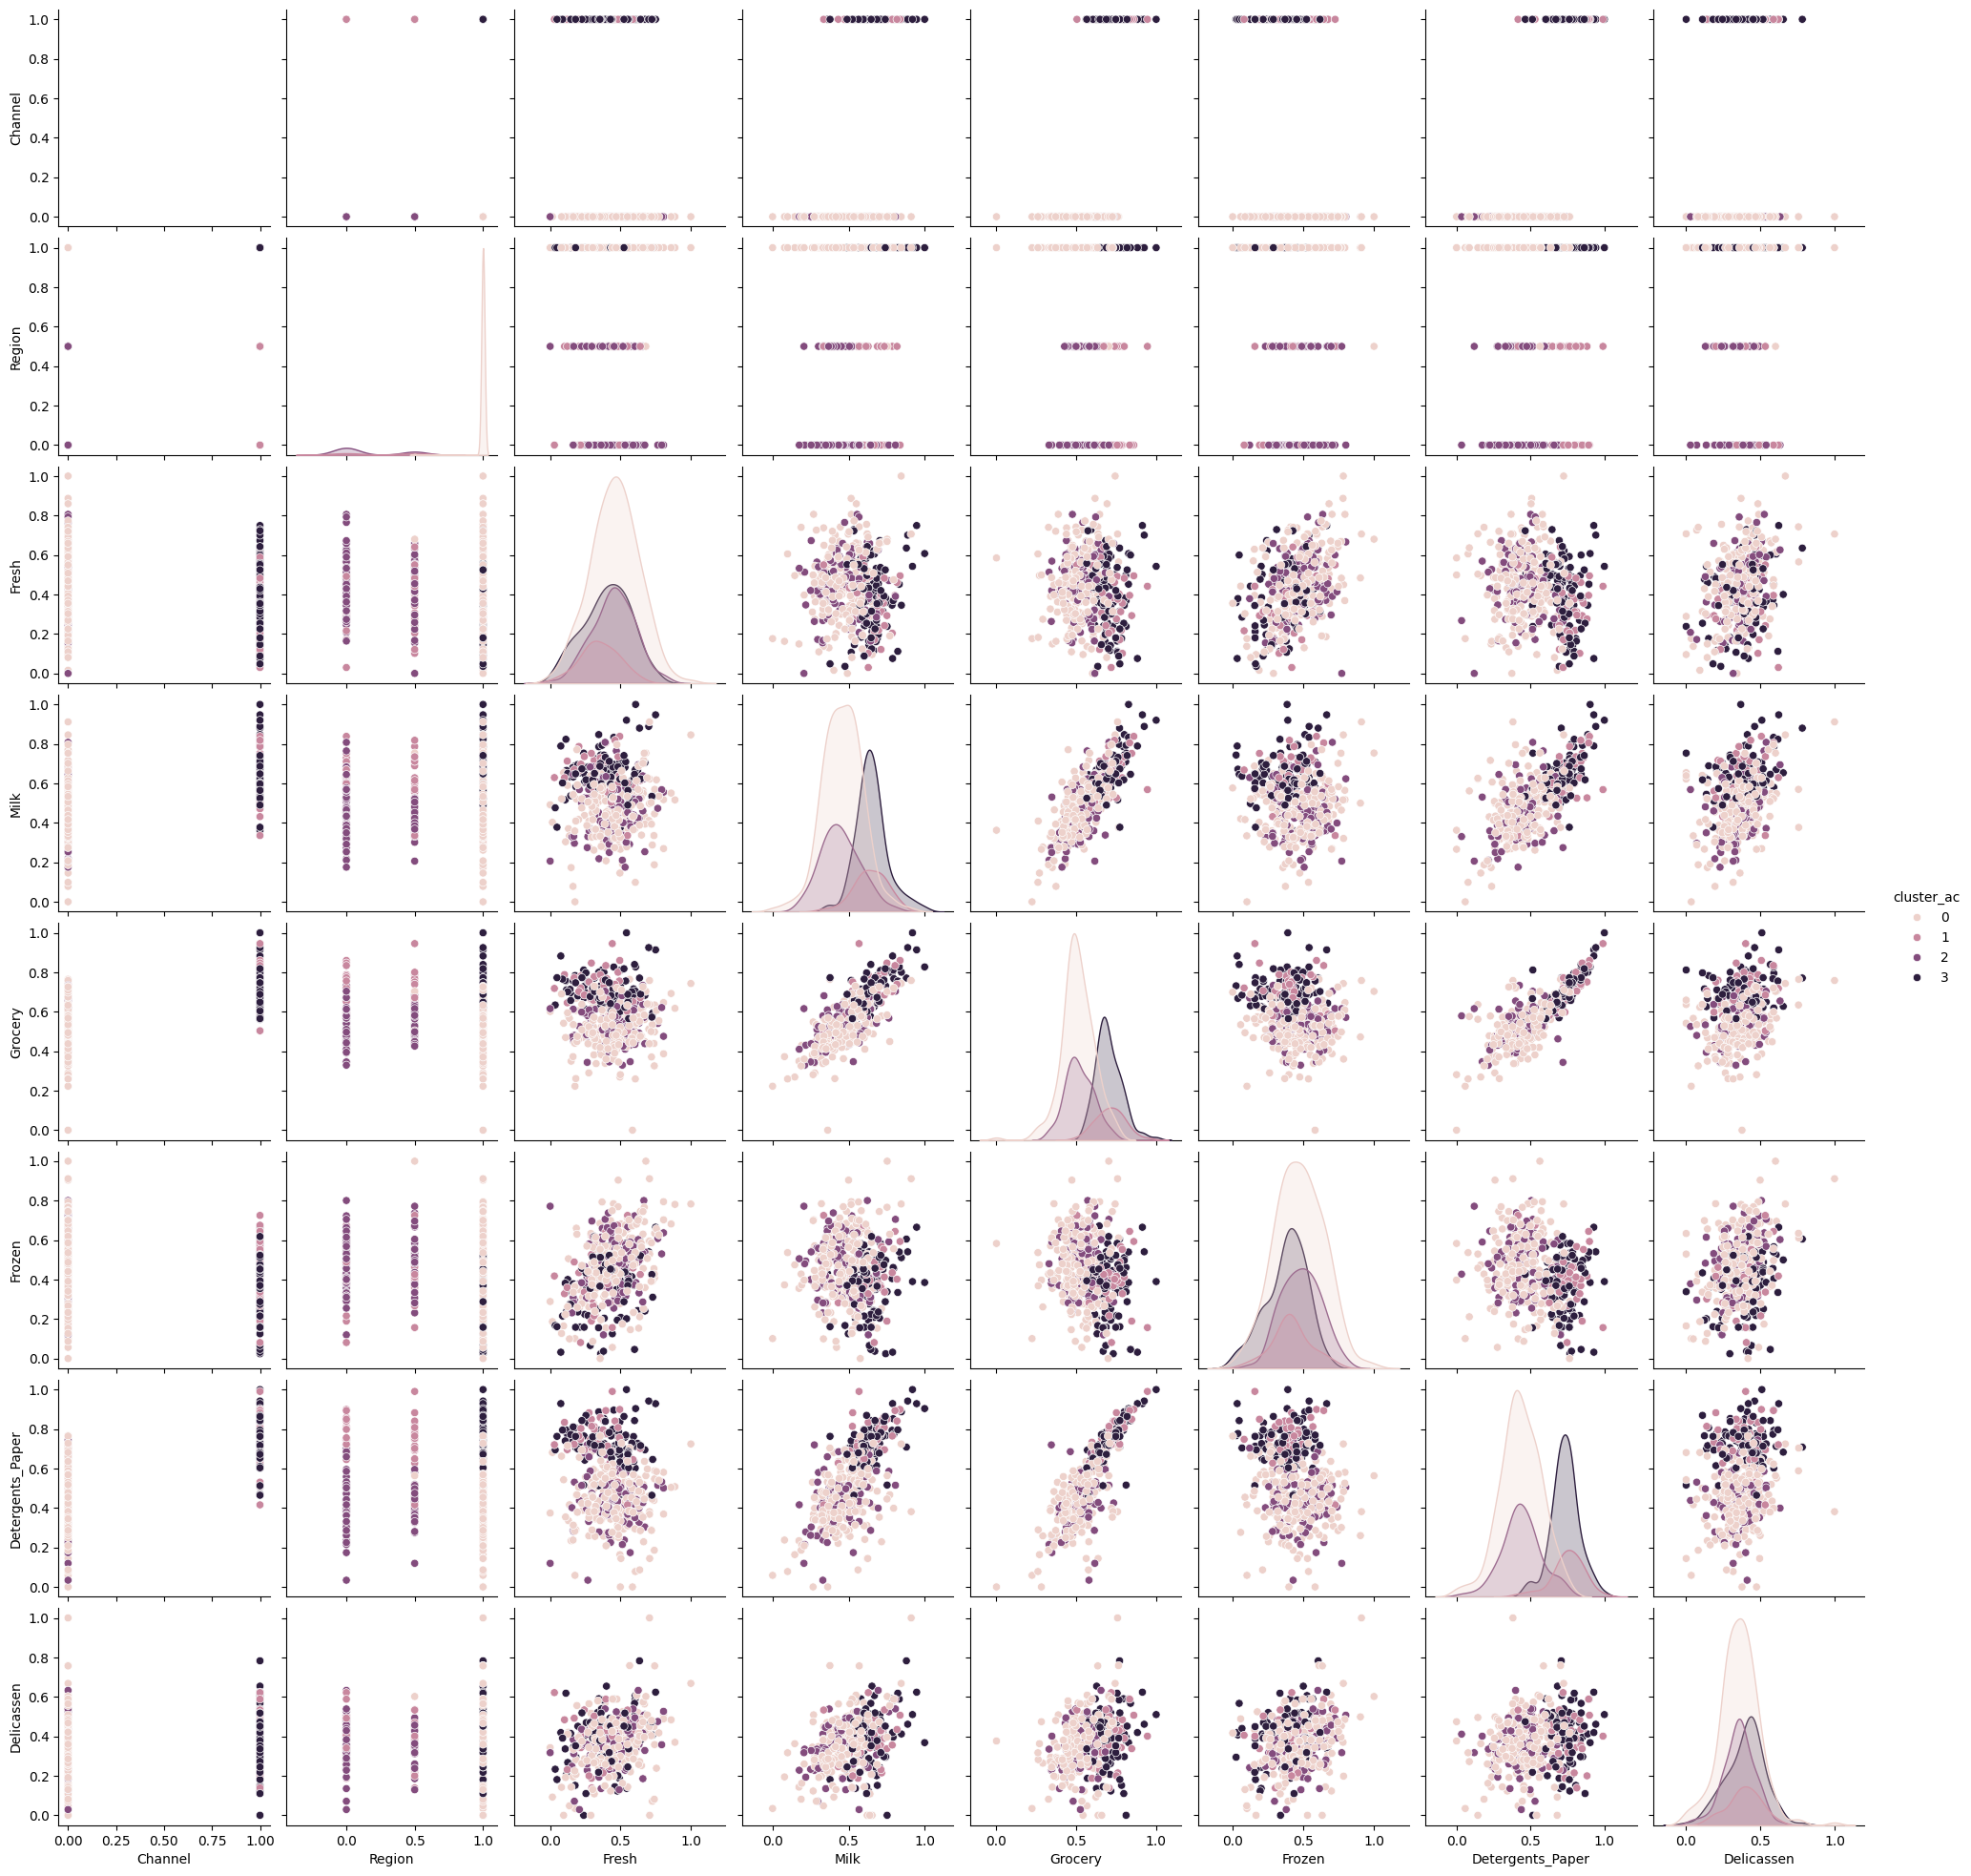

In [47]:
X_plot = X.copy()
X_plot['cluster_ac'] = y_ac
sns.pairplot(X_plot, hue='cluster_ac')
plt.show()




### **Comment on the Agglomerative Clustering Pairplot:**

1. **Cluster separation:**

   * The clusters are moderately well separated along certain features like **Fresh, Milk, Grocery**, and **Detergents_Paper**.
   * Clusters 0 and 1 are visually distinct in some scatterplots, while clusters 2 and 3 overlap more in features like **Frozen** and **Delicassen**.

2. **Feature contribution:**

   * Features **Fresh, Milk, Grocery** seem to contribute most to the clustering, as the points of different clusters occupy distinct regions.
   * Categorical features like **Channel** and **Region** show vertical or horizontal stripes, indicating that they have less influence on clustering.

3. **Cluster sizes and distribution:**

   * From the density plots on the diagonal, we see that some clusters contain more samples than others (e.g., cluster 3 has slightly higher density in **Delicassen**).
   * This matches the earlier pie chart showing cluster sizes.

4. **Overlap:**

   * Some clusters overlap in certain feature combinations (e.g., **Frozen vs Grocery**), suggesting that not all features perfectly separate the clusters.
   * This is expected, as real-world data often has clusters that are not completely separable.

**Overall:**
The Agglomerative clustering with 4 clusters and **ward linkage** captures the main structure of the data, with clear separation along major features, while some overlap exists in less discriminative features.



# **KMEANS CLUSTERING**

In [49]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df0 = pd.read_csv(url)

In [50]:
df0.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [53]:
df0.describe(include = 'all')

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [55]:
print("the dataset has {} number of rows and {} number of columns".format(df0.shape[0], df0.shape[1]))

the dataset has 440 number of rows and 8 number of columns


**EXPLORATORY DATA ANALYSIS**

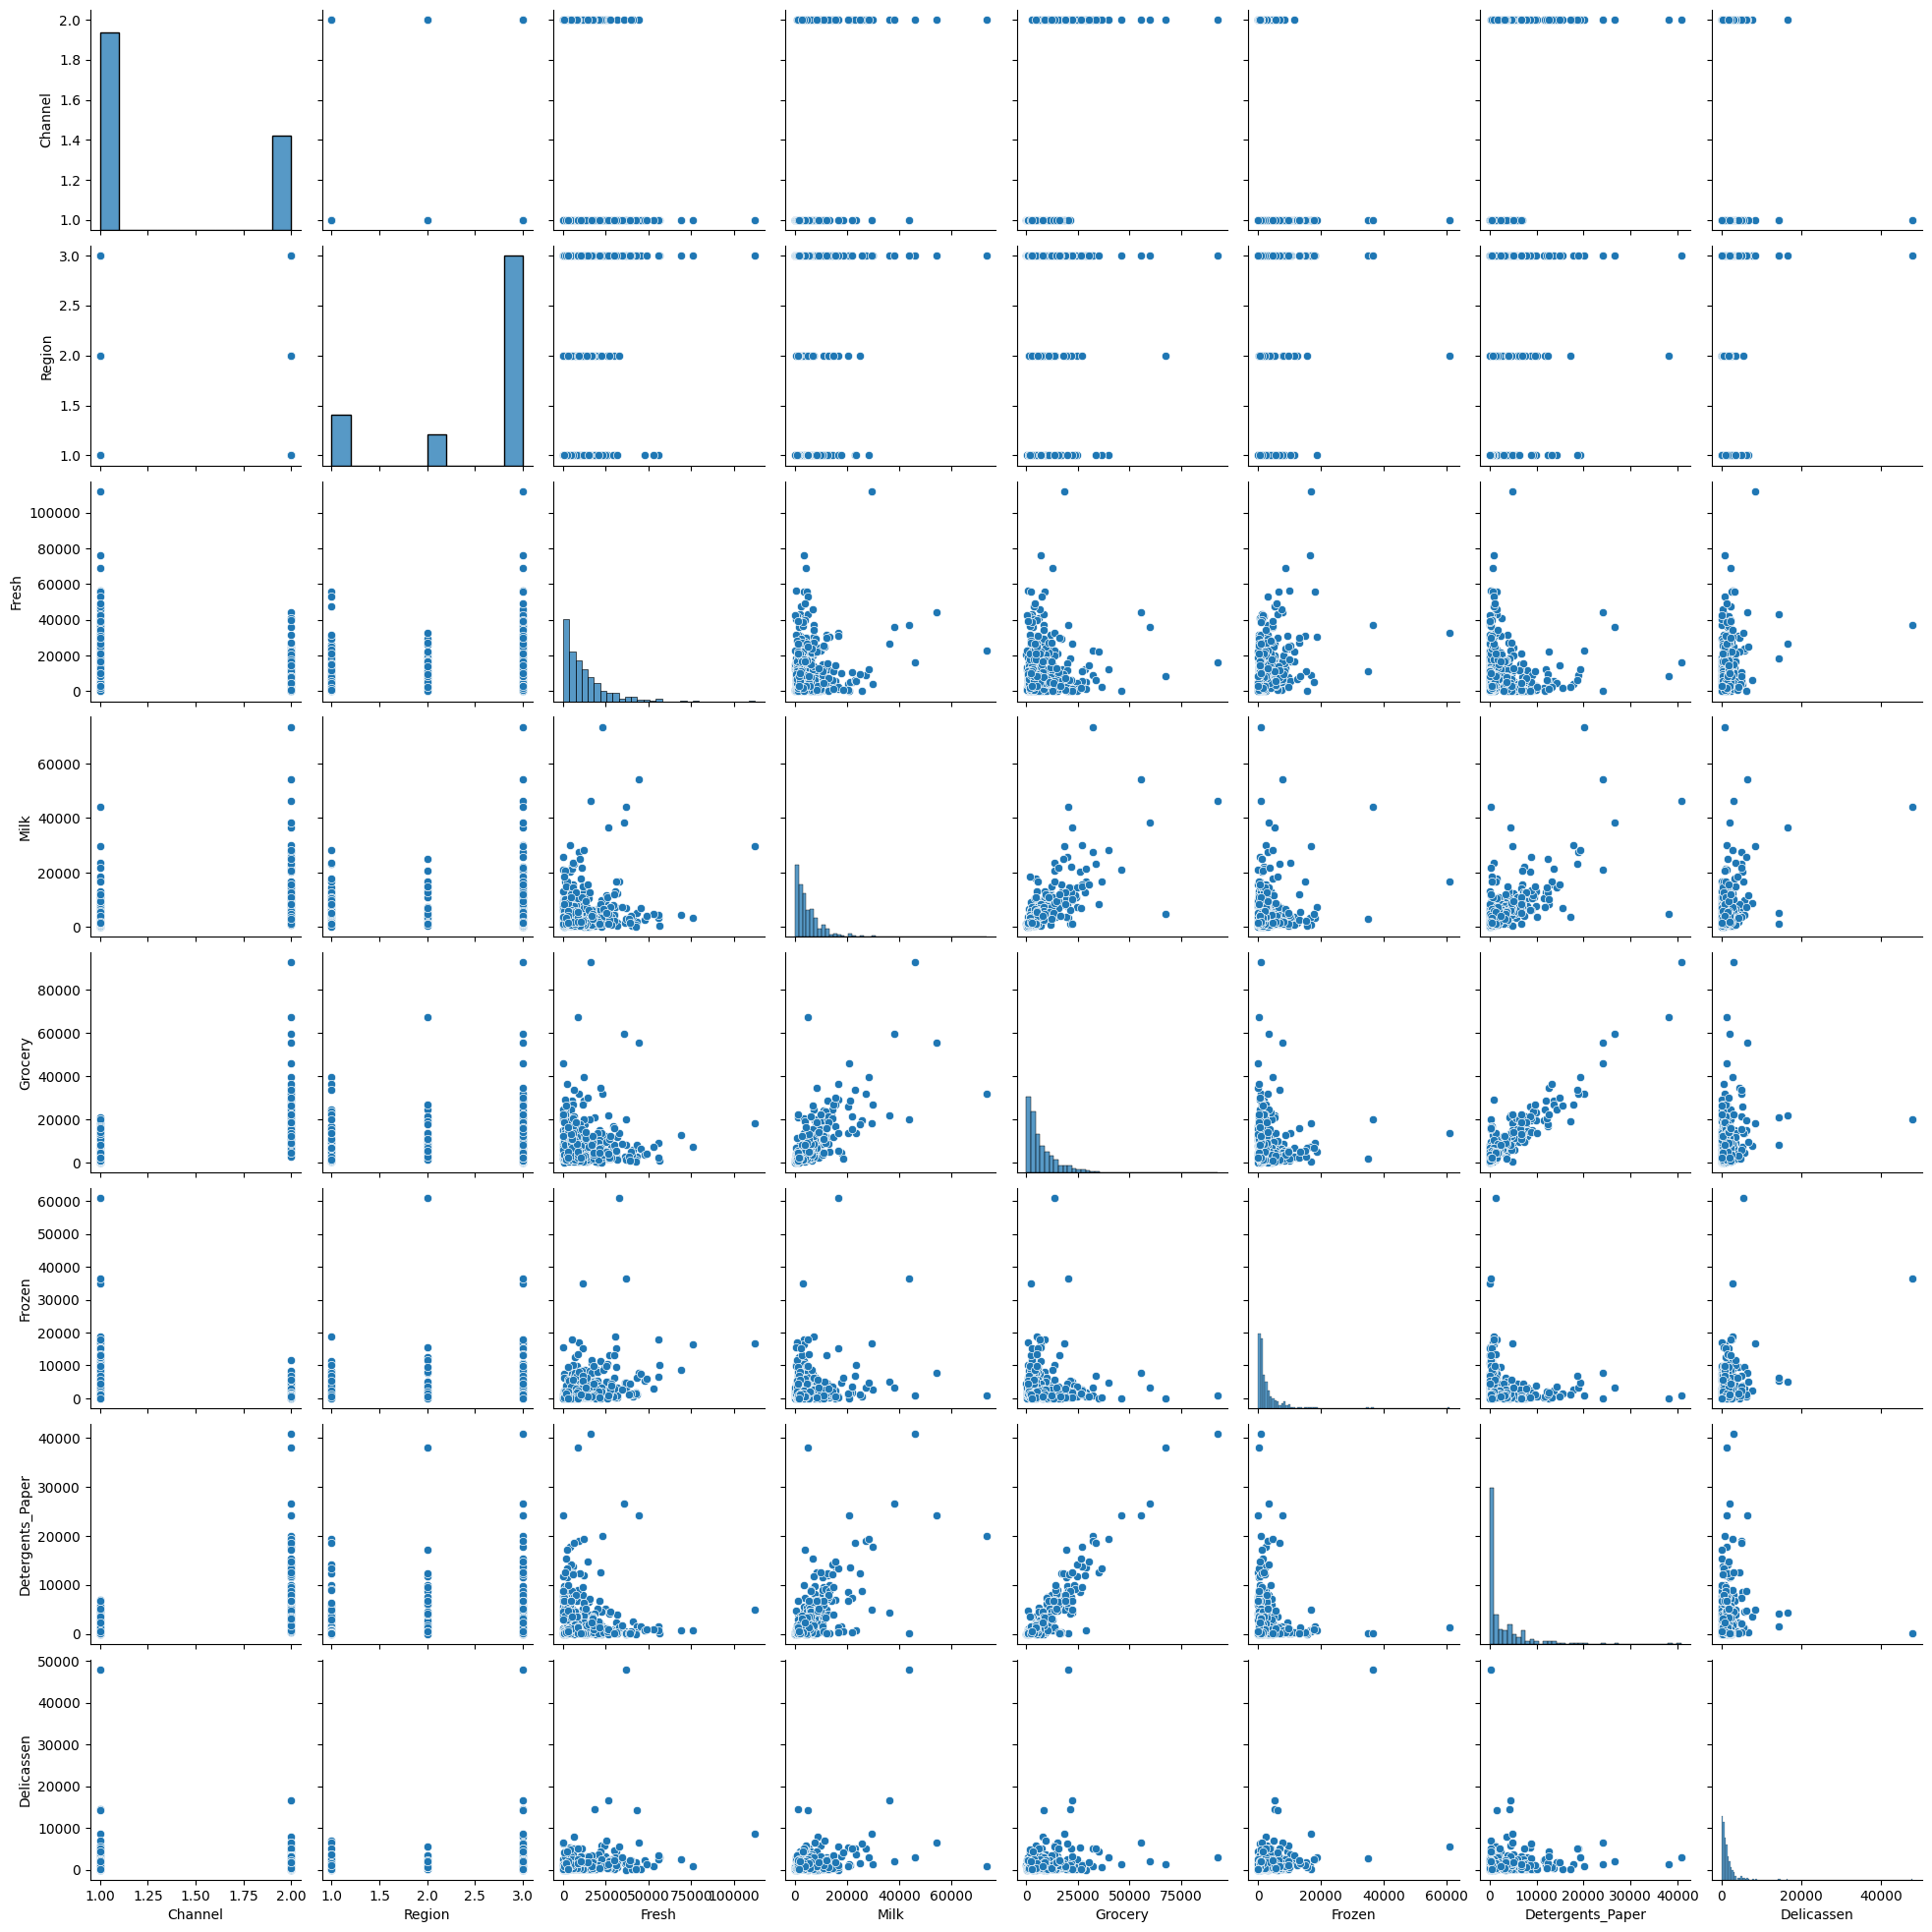

In [56]:
sns.pairplot(df0)
plt.show()

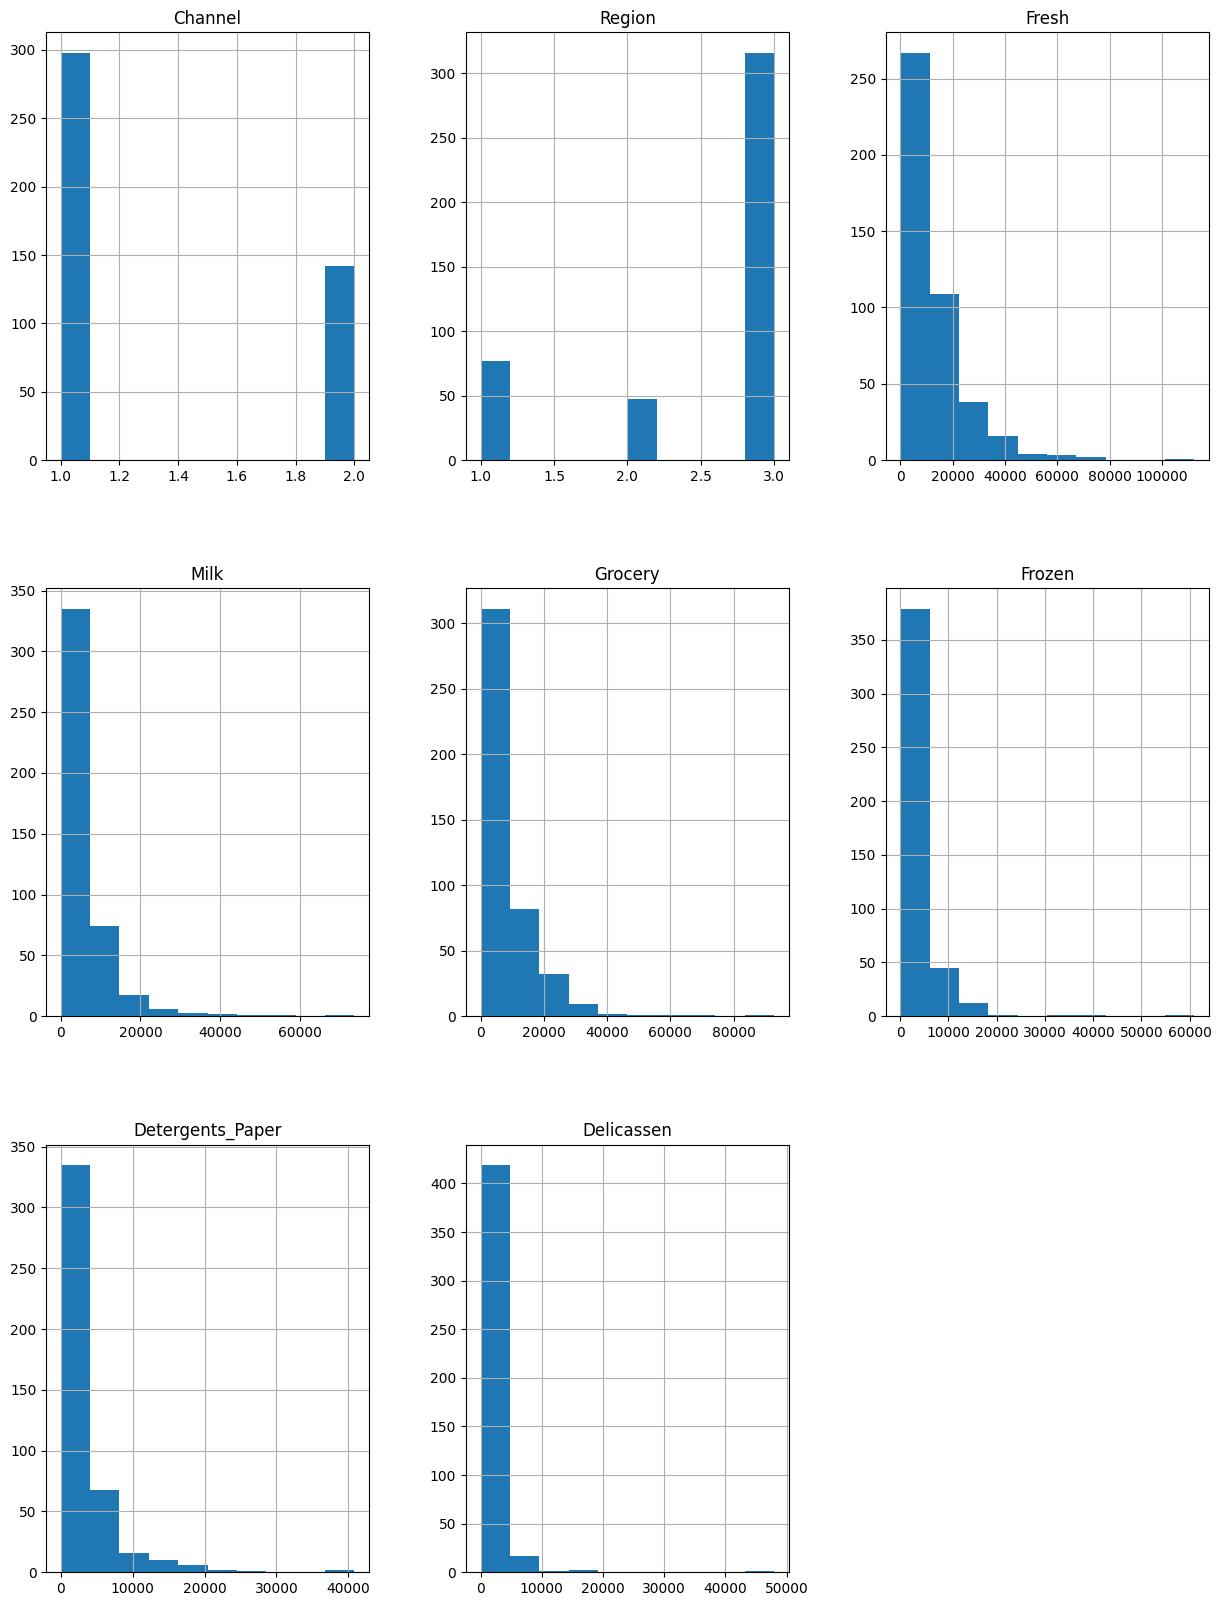

In [58]:
df0.hist(figsize=(15,20))
plt.show()

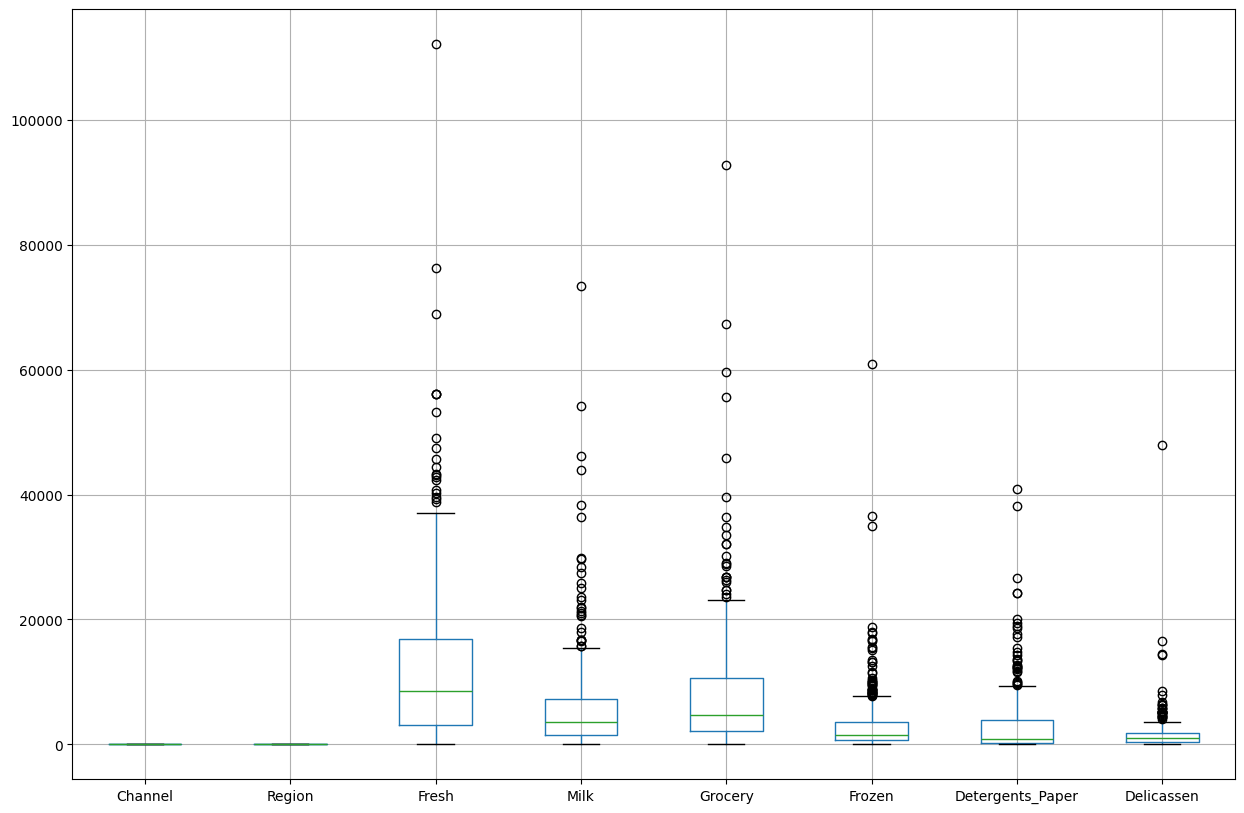

In [59]:
df0.boxplot(figsize=(15,10))
plt.show()

Explanation:

Numerical features are skewed and have large ranges.

Clustering is distance-based, so preprocessing is needed to normalize features.

Preprocessing , powertransformer and minmaxscalar

In [60]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
pt = PowerTransformer()

In [62]:
x_pt = pd.DataFrame(pt.fit_transform(df0.iloc[:,2:]),columns = df0.columns[2:])
x_trasf = pd.concat([df0.iloc[:,:2],x_pt], axis = 1)

In [63]:
mms = MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x_trasf) , columns = x_trasf.columns)
x.head()

Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.501828  0.667606  0.625238  0.208640          0.649941   
1      1.0     1.0  0.414266  0.670028  0.655690  0.458800          0.674852   
2      1.0     1.0  0.400077  0.653586  0.627297  0.499856          0.682752   
3      0.0     1.0  0.509368  0.369264  0.553550  0.636716          0.461095   
4      1.0     1.0  0.604755  0.580657  0.618985  0.566470          0.601884   

   Delicassen  
0    0.412016  
1    0.445663  
2    0.654292  
3    0.446485  
4    0.590255

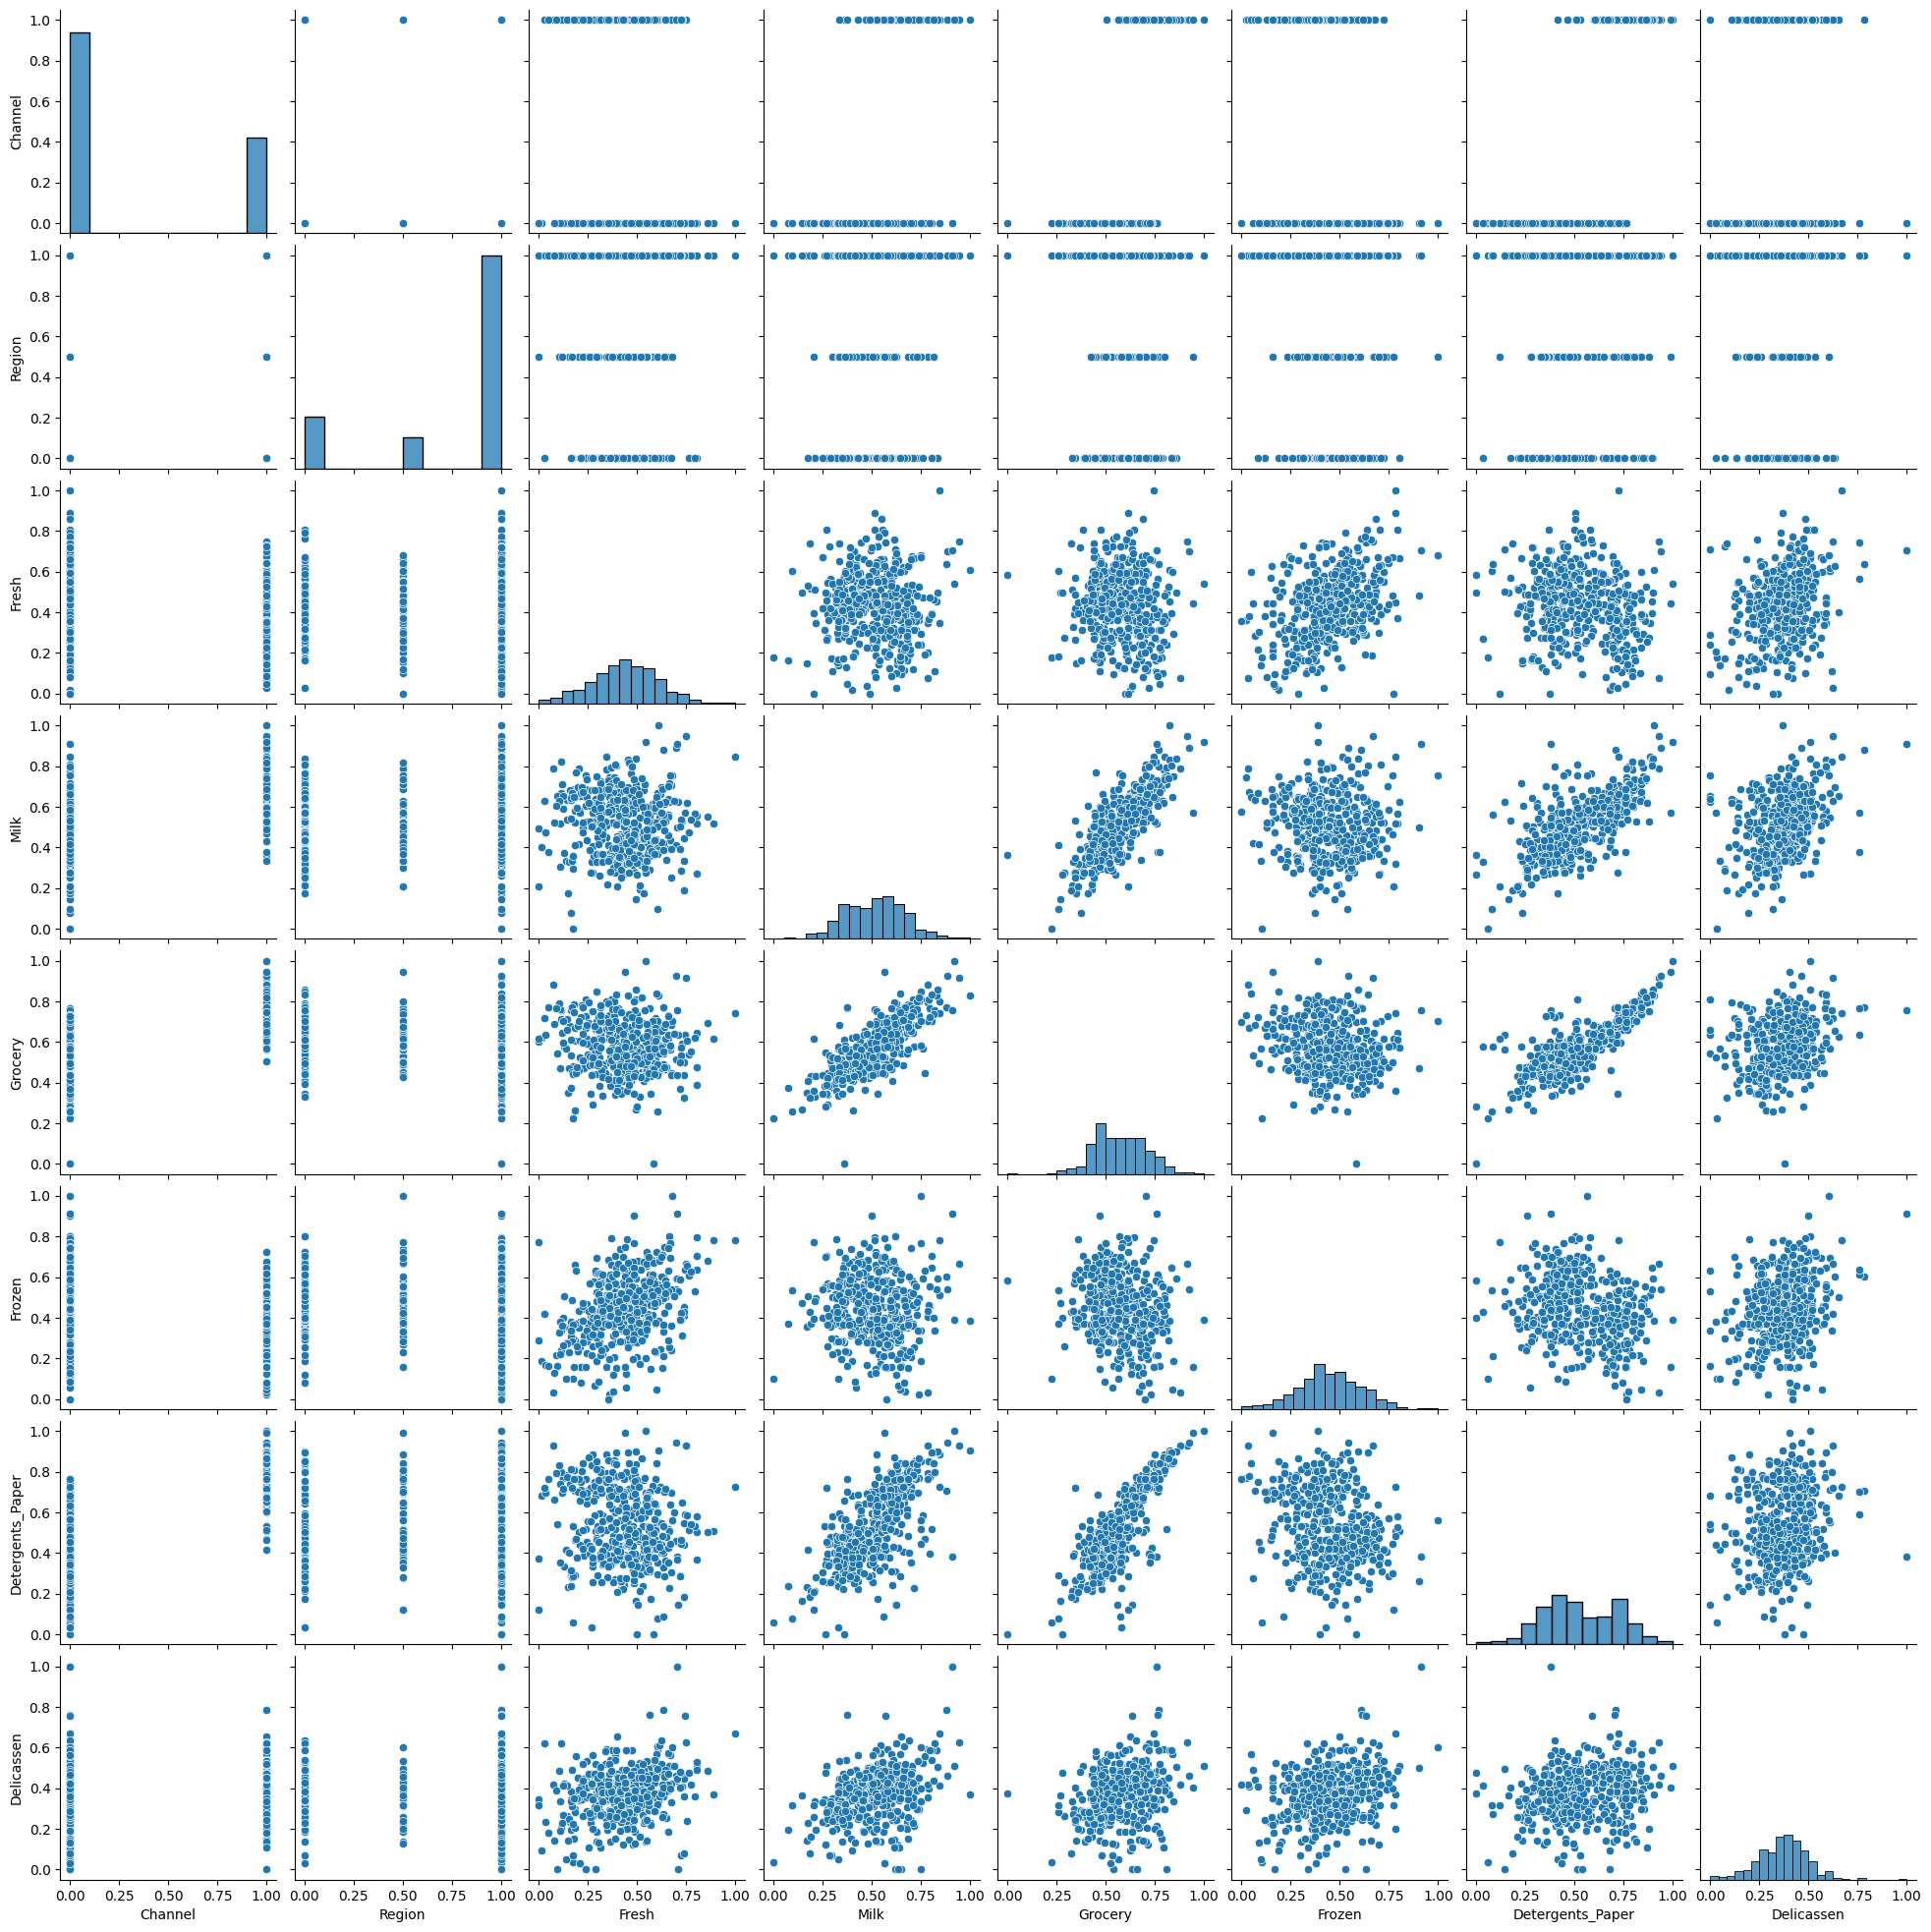

In [101]:
sns.pairplot(x)
plt.show()

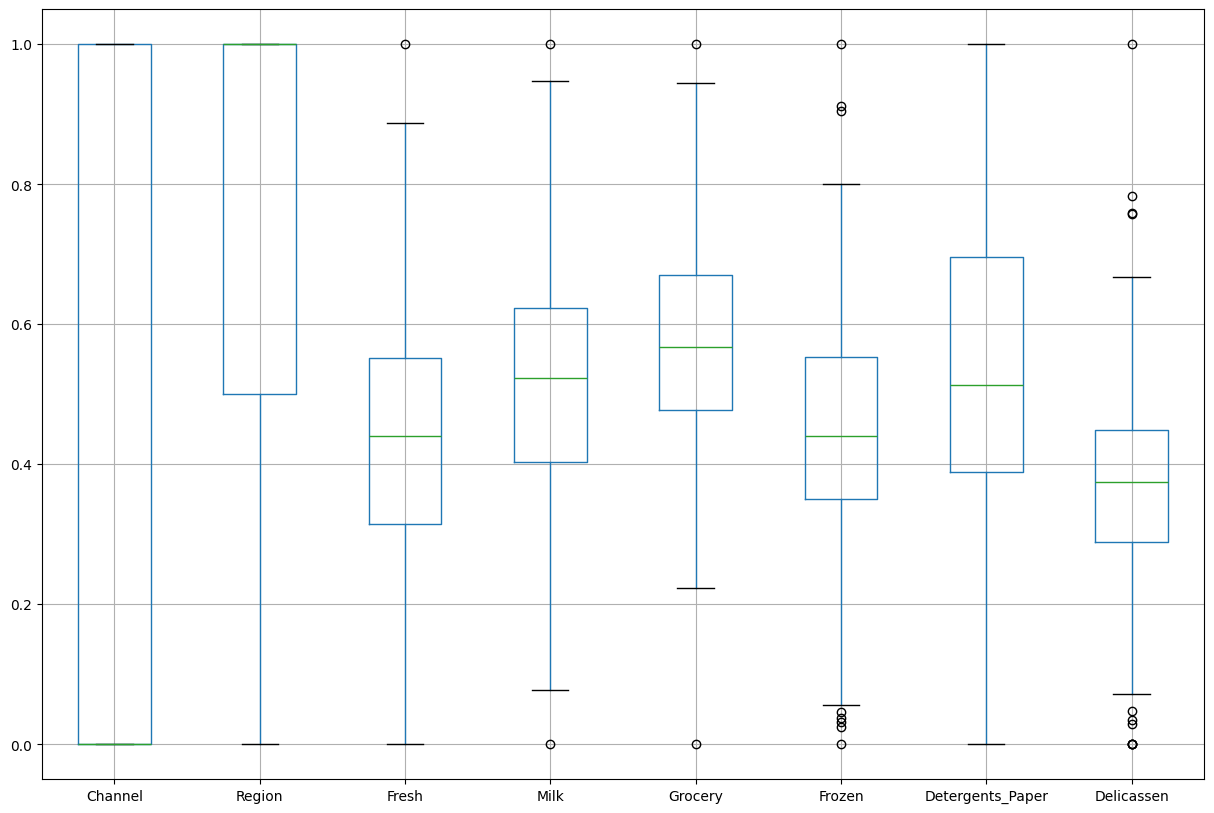

In [102]:
x.boxplot(figsize=(15,10))
plt.show()

Determine the Optimal Number of Clusters (Elbow Method + Silhouette)

In [67]:
from sklearn.cluster import KMeans


In [68]:
k_range = list(range(2,11))
parameters_km = [{'n_clusters' : k_range}]
pg = list(ParameterGrid(parameters_km))

In [75]:
inertias_km = []
sil_scores_km = []
for i in range(len(pg)):
  km= KMeans(**(pg[i]) , random_state = random_state)
  y_km = km.fit_predict(X)
  inertias_km.append(km.inertia_)
  sil_scores_km.append(silhouette_score(x,y_km))

Plot Inertia and Silhouette Scores
Explanation:

Elbow Method: Look for the point where inertia curve "bends" → adding more clusters doesn’t reduce inertia much.

Silhouette Score: Peak value indicates the best separation between clusters.

Typically, we choose k where inertia starts to flatten and silhouette is high.

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

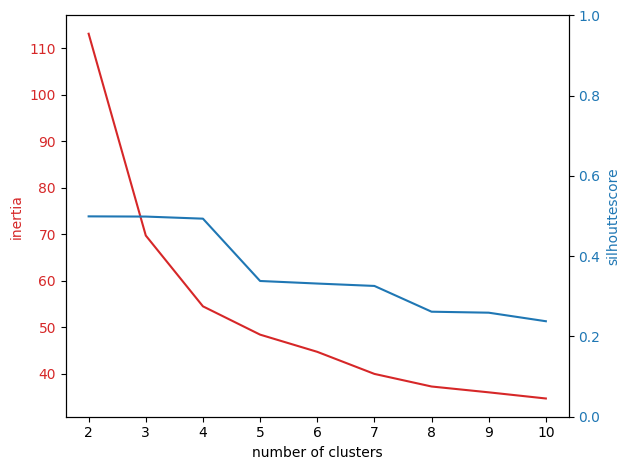

In [82]:


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('inertia', color=color)
ax1.plot(k_range, inertias_km, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouttescore', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, sil_scores_km, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1)  # silhouette score range

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

k = 4 looks reasonable (matches silhouette peak and inertia elbow).

In [83]:
#Fit K-Means with Optimal k
k=4
km = KMeans(n_clusters=k,
            random_state=random_state)
y_km = km.fit_predict(X)

In [85]:
inertia = inertias_km[k_range.index(k)]
sil_score = sil_scores_km[k_range.index(k)]

In [88]:
print(f"Number of clusters = {k} - Distortion = {inertia:.2f} - Silhouette score = {sil_score:.2f}")


Number of clusters = 4 - Distortion = 54.49 - Silhouette score = 0.49


In [89]:
clust_size_km = np.unique(y_km, return_counts=True)
print(clust_size_km)

(array([0, 1, 2, 3], dtype=int32), array([105,  87, 211,  37]))


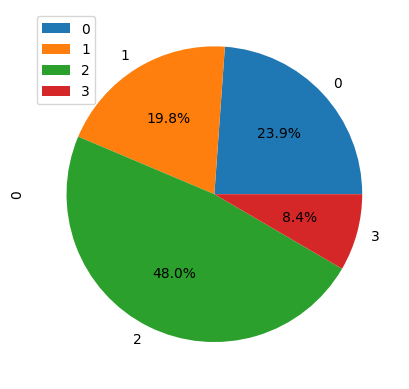

In [99]:
pd.DataFrame(clust_size_km[1]).plot.pie(y=0, autopct='%1.1f%%', );
plt.show()


COMPARISON BETWEN AGG AND KMEANS

In [104]:
sil_km = silhouette_score(X, y_km)  # KMeans
sil_ac = silhouette_score(X, y_ac)  # Agglomerative

print(f"KMeans silhouette score: {sil_km:.4f}")
print(f"Agglomerative silhouette score: {sil_ac:.4f}")


KMeans silhouette score: 0.4936
Agglomerative silhouette score: 0.4931


In [105]:
clust_sizes_km = np.unique(y_km, return_counts=True)
clust_sizes_ac = np.unique(y_ac, return_counts=True)

print("KMeans cluster sizes:", clust_sizes_km[1])
print("Agglomerative cluster sizes:", clust_sizes_ac[1])


KMeans cluster sizes: [105  87 211  37]
Agglomerative cluster sizes: [212  37  86 105]


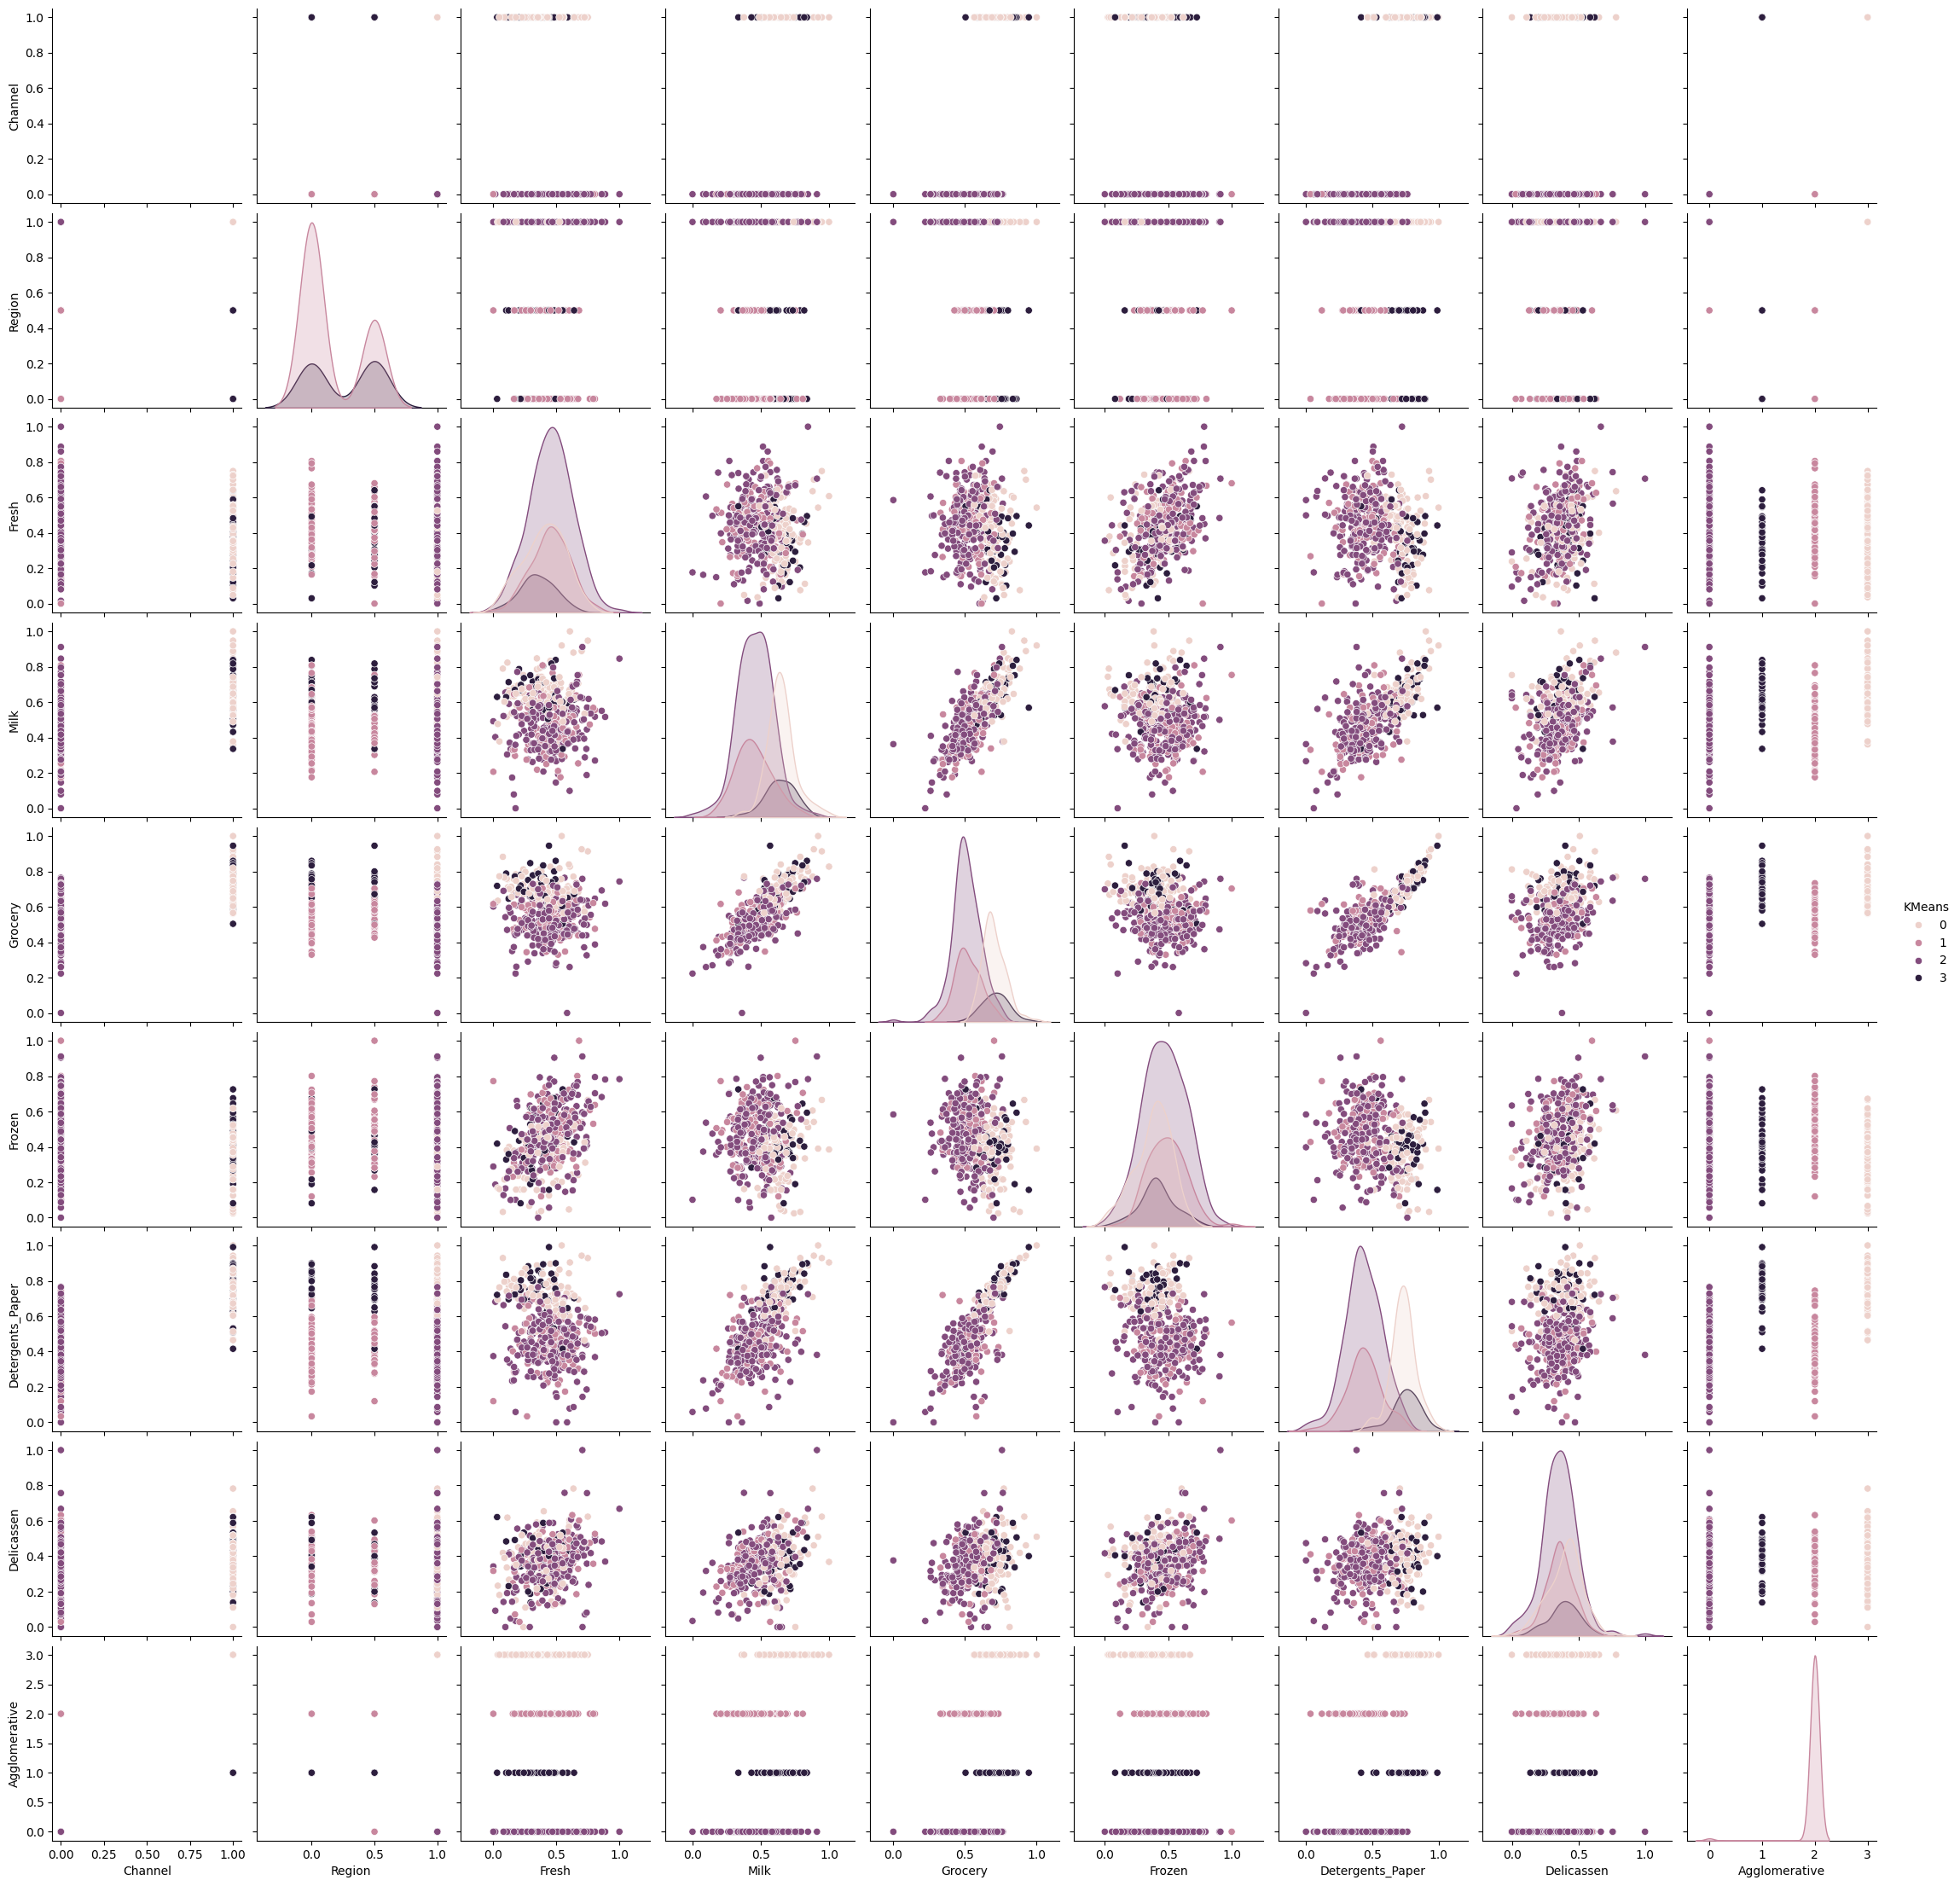

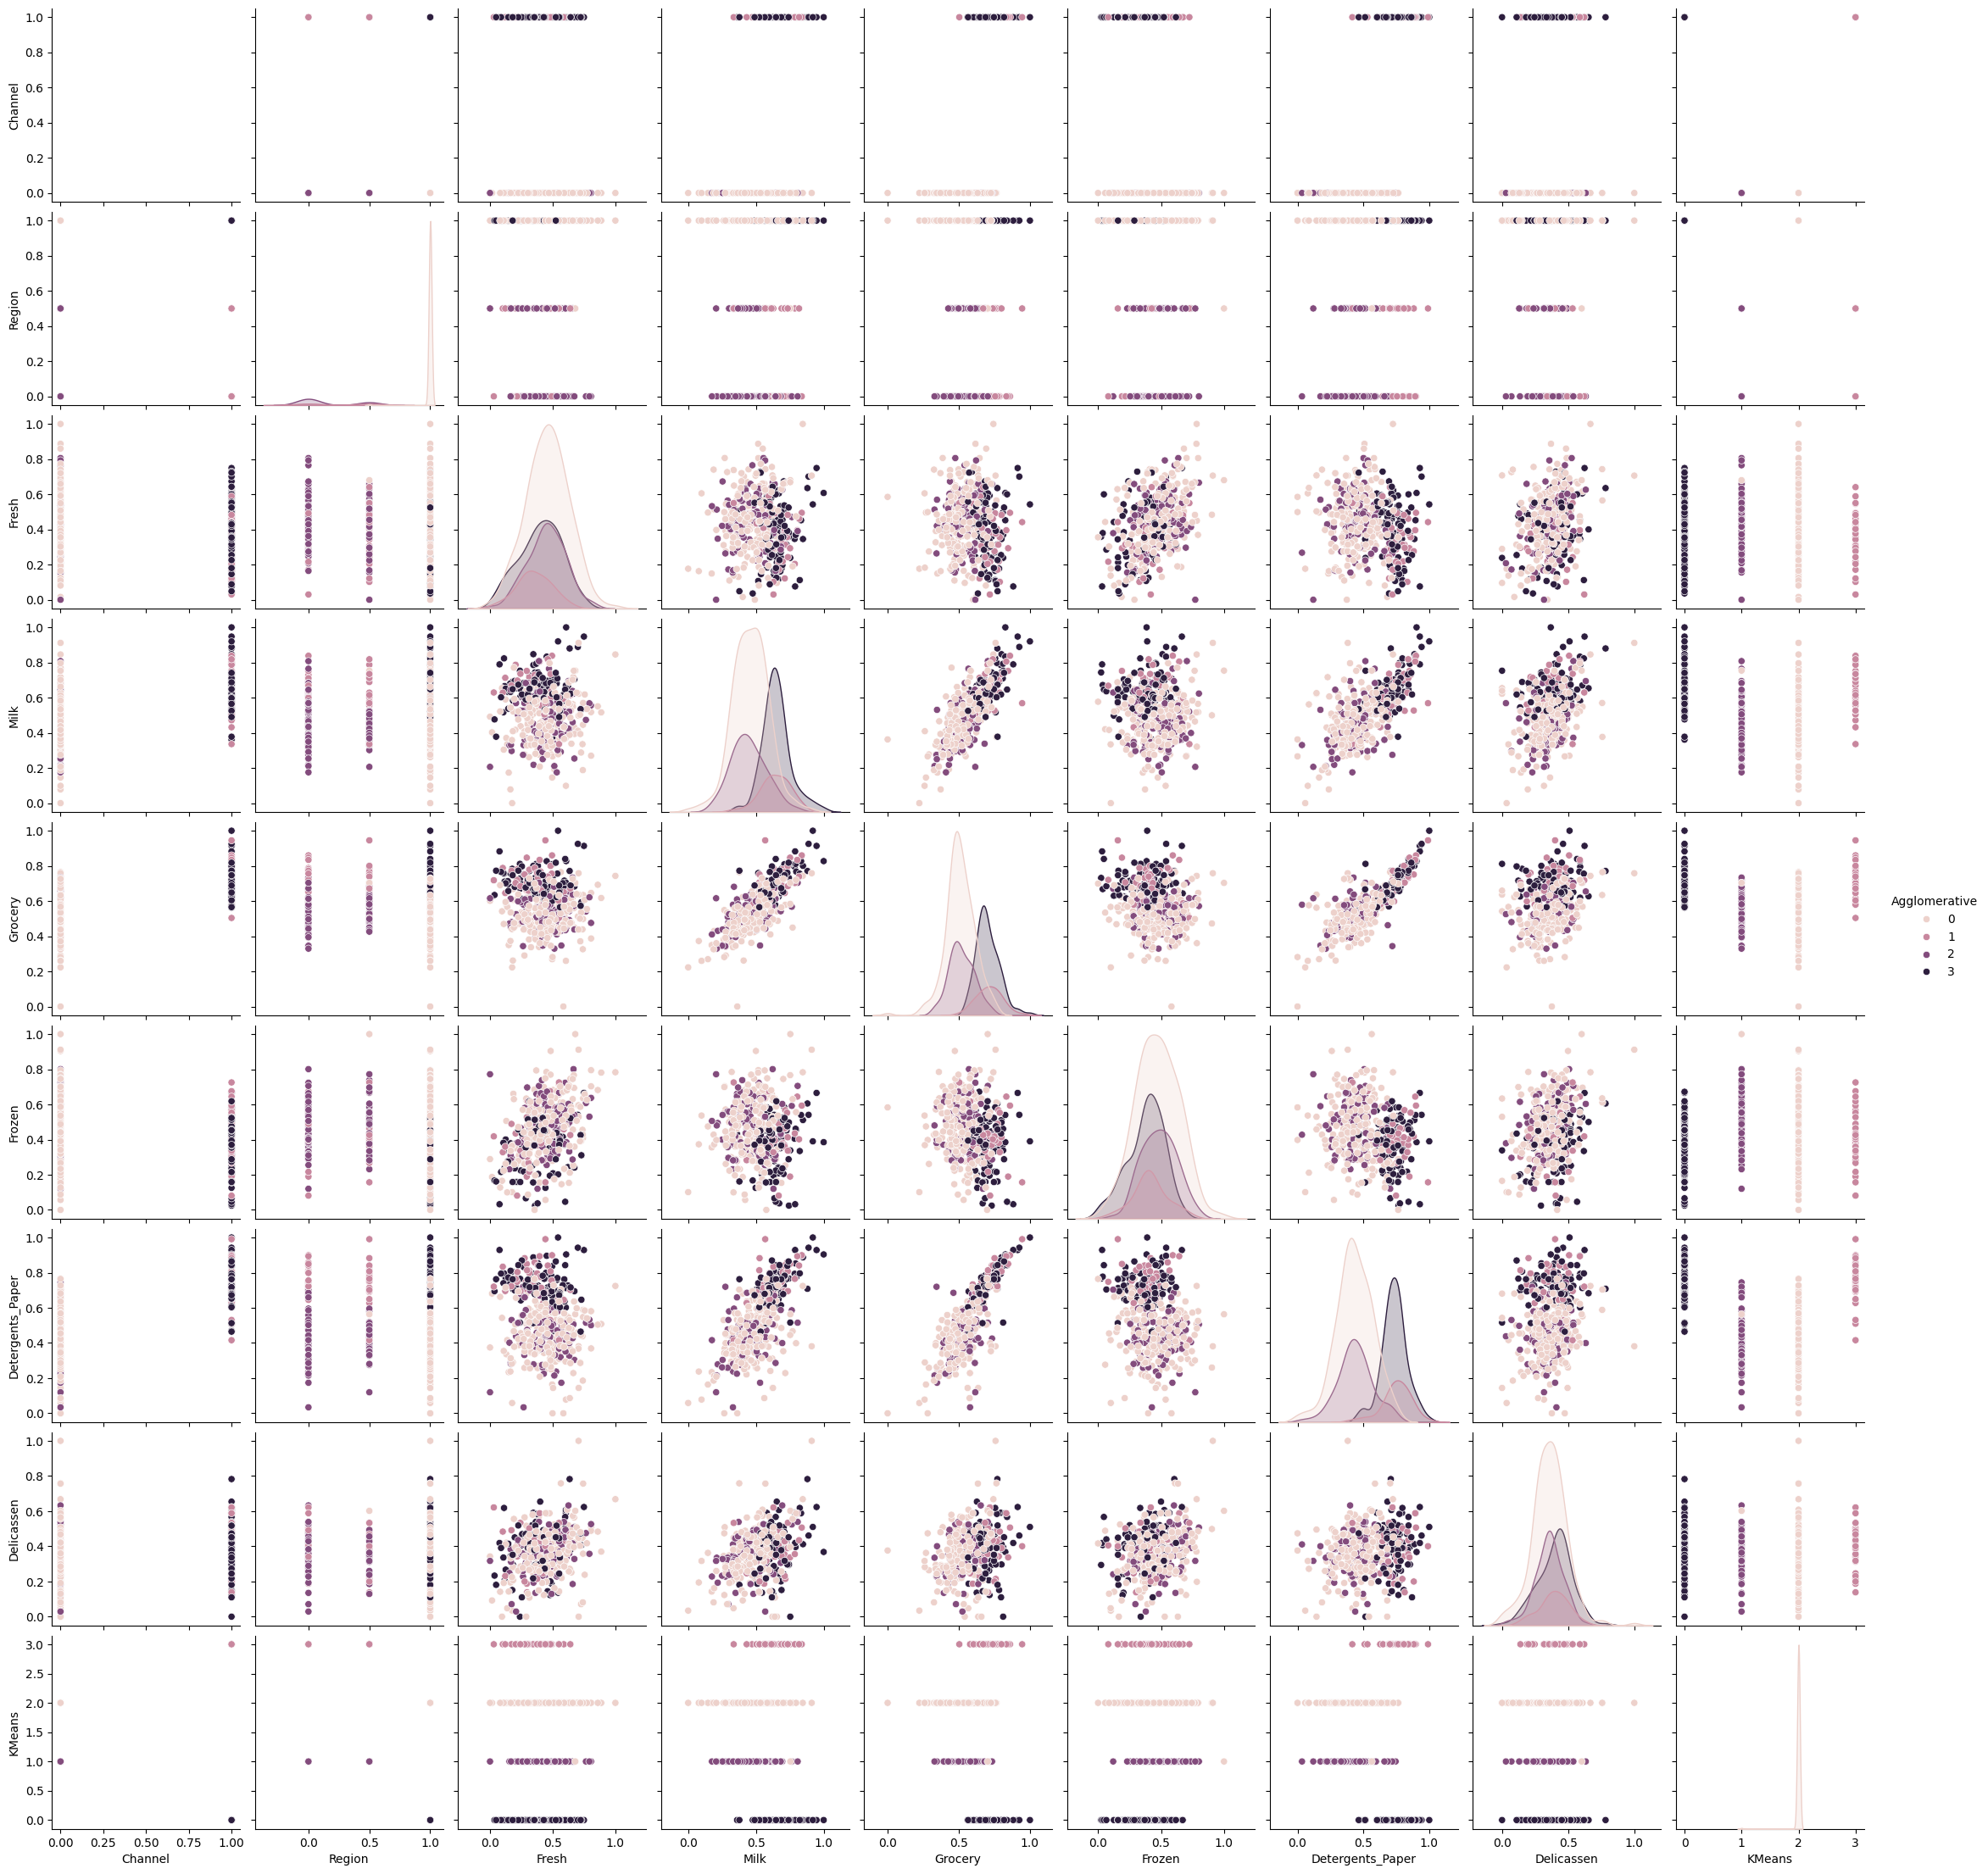

In [106]:
X_plot = X.copy()
X_plot['KMeans'] = y_km
X_plot['Agglomerative'] = y_ac

sns.pairplot(X_plot, hue='KMeans')
plt.show()

sns.pairplot(X_plot, hue='Agglomerative')
plt.show()


In [107]:
from sklearn.metrics import pair_confusion_matrix

pcm = pair_confusion_matrix(y_km, y_ac)
pcm_normalized = pcm / pcm.sum()
print("Pair Confusion Matrix (Normalized):\n", pcm_normalized)

match_percentage = pcm_normalized.diagonal().sum() * 100
print(f"Agreement between KMeans and Agglomerative: {match_percentage:.2f}%")


Pair Confusion Matrix (Normalized):
 [[0.66625595 0.00218472]
 [0.00089045 0.33066888]]
Agreement between KMeans and Agglomerative: 99.69%



# **Clustering Comparison Theory Cheat Sheet**

### ** Key Metrics**

* **Silhouette Score (primary)**

  * Measures cohesion & separation: `[-1,1]`
  * **>0.5 → good**, 0.25–0.5 → moderate, <0.25 → weak
* **Cluster Sizes**

  * Avoid extremely small or empty clusters → indicates poor clustering
* **Optional:** Davies-Bouldin (lower better), Calinski-Harabasz (higher better)

---

### **Visual Checks**

* **Pairplots:** clusters should be distinct along major features
* **Pie charts:** check balance of cluster sizes
* **Silhouette plots:** check per-cluster quality, outliers, and noise

---

### **KMeans vs Agglomerative**

| Feature         | KMeans                          | Agglomerative                      |
| --------------- | ------------------------------- | ---------------------------------- |
| Cluster Shape   | Spherical / convex              | Any shape (flexible)               |
| Hyperparameters | n_clusters, init, max_iter      | n_clusters, linkage                |
| Deterministic   | No (unless random_state fixed)  | Yes                                |
| Scalability     | Fast (large datasets)           | Slower (computationally heavy)     |
| Sensitivity     | Sensitive to outliers           | Less sensitive to outliers         |
| Best for        | Well-separated, convex clusters | Hierarchical or irregular clusters |

---

### **How to Pick the Best Method**

1. **Highest silhouette score** → primary indicator
2. **Balanced cluster sizes** → no tiny clusters
3. **Visual separation** → clusters clearly separable in pairplots
4. **Consistency / stability** → repeat runs, KMeans with random_state, Agglomerative deterministic
5. **Interpretability & simplicity** → prefer KMeans for simple convex clusters

---

### **️ Quick Rules**

* **Elbow method + silhouette** → pick optimal k for KMeans
* **Agglomerative** → use silhouette & linkage to choose best hierarchy
* **Check agreement** → pair_confusion_matrix to see if methods agree (>90% → similar structure)
* **Outliers / skewed features** → transform (PowerTransformer / MinMaxScaler) before clustering

---

 **Memory Tip:**

> **"Silhouette first, size next, visuals always, KMeans for speed, Agglo for hierarchy"**

---


In [108]:
#just tryig with diff k
k=3
km = KMeans(n_clusters=k,
            random_state=random_state)
y_km = km.fit_predict(X)

In [109]:
inertia = inertias_km[k_range.index(k)]
sil_score = sil_scores_km[k_range.index(k)]

In [110]:
print(f"Number of clusters = {k} - Distortion = {inertia:.2f} - Silhouette score = {sil_score:.2f}")

Number of clusters = 3 - Distortion = 69.72 - Silhouette score = 0.50


In [111]:
clust_size_km = np.unique(y_km, return_counts=True)
print(clust_size_km)

(array([0, 1, 2], dtype=int32), array([142,  87, 211]))




---

## **Step 1: Compare Silhouette Scores**

* **KMeans:** 0.50
* **Agglomerative:** 0.4931

**Interpretation:**

* Silhouette measures how well-separated and cohesive clusters are.
* Higher is better.
* **KMeans has a slightly higher silhouette → slightly better cohesion/separation**.

---

## **Step 2: Look at Cluster Sizes**

* **KMeans:** [142, 87, 211] → fairly balanced
* **Agglomerative:** [212, 37, 86, 105] → one cluster is very small (37)

**Interpretation:**

* Extremely small clusters (like 37 points) may indicate over-segmentation or a noisy cluster.
* KMeans clusters are **more balanced** → better for interpretability and generalization.

---

## **Step 3: Consider Number of Clusters**

* **KMeans:** 3 clusters
* **Agglomerative:** 4 clusters

**Interpretation:**

* More clusters are not always better.
* If silhouette is similar, fewer clusters with balanced sizes are generally preferable.
* Here, KMeans has **slightly fewer clusters** → simpler, easier to explain.

---

## **Step 4: Optional – Visual Check**

* Check **pairplots** or **feature separation**:

  * Are the clusters well-separated visually?
  * Do features like Fresh, Milk, Grocery separate clusters?
* Usually KMeans will show **more distinct groupings** in major features if silhouette is higher.

---

## **Step 5: Decision**

* **Best clustering scheme here:** **KMeans**

  * Slightly higher silhouette
  * Balanced cluster sizes
  * Simpler number of clusters (3 vs 4)

**Agglomerative:** still valid, captures similar structure, but less balanced and slightly lower silhouette.

---

### **Rule of Thumb for Future Datasets**

1. Compare **silhouette scores first** → higher = better separation & cohesion.
2. Check **cluster sizes** → avoid very small or empty clusters.
3. Consider **number of clusters** → fewer clusters preferred if quality similar.
4. Check **visual separation** → confirm clusters are meaningful along key features.
5. Optional: use **pair_confusion_matrix** to compare methods if multiple algorithms give similar results.

---

**In your case:**

> Even though Agglomerative gives 4 clusters, KMeans with 3 clusters is **slightly better** due to higher silhouette and more balanced clusters.



In [113]:
from sklearn.metrics import pair_confusion_matrix
pcm = pair_confusion_matrix(y_km,y_ac)
pcm / pcm.sum()

array([[0.62603023, 0.00218472],
       [0.04111617, 0.33066888]])

In [114]:
print("The percentage of match between the two clustering schemes is {:6.2f}%"\
    .format((pcm / pcm.sum()).diagonal().sum()*100))

The percentage of match between the two clustering schemes is  95.67%
